# **PRiAD**
**30.01.2021**

*Kasprzak Arkadiusz, Kowalski Krzysztof, Milewski Adrian*

**Grupowanie państw na podstawie wyglądu ich flagi**

---



Zaimportowanie potrzebnych bibliotek:
*  **numpy** - biblioteka służąca do operacji na macierzach. W projekcie potrzebna do znalezienia wartości unikalnych w każdej kolumnie oraz wyznaczenia wartości średniej z tablicy walidacji krzyżowej (cross validation).
*  **pandas** - biblioteka służąca m.in. do tworzenia ramek danych oraz przeprowadzania operacji na nich. Wykorzystano ją do zmiany sposobu wyświetlania liczb zmiennoprzecinkowych oraz użyto metody get_dummies() do konwersji zmiennych typu kategorycznego na szereg 0 i 1.
*  **matplotlib** - biblioteka do tworzenia wykresów.
*  **seaborn** - biblioteka do wizualizacji danych. Użyto jej do stworzenia wykresów słupkowych.
*  **warnings** - biblioteka służąca do obsługi ostrzeżeń. Wykorzystana do ukrycia irytujących ostrzeżeń z bibliotek matplotlib oraz seaborn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.display.float_format = "{:.2f}".format

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

W projekcie wykorzystano dwa zbiory danych:

1.   Zbiór danych z repozytorium uczenia maszynowego UCI.
     [Więcej informacji o tym zbiorze](http://archive.ics.uci.edu/ml/datasets/Flags)
2.   Zbiór danych znajdujących się na platformie ISOD o nazwie *alphabetical-list-of-countries2020.xlsx*

Za pomocą poniższego kodu zbiory te zostają wczytane. Następnie zostaje wyświetlone ich 5 pierwszych obiektów. 

In [ ]:
flag_data_url = "https://raw.githubusercontent.com/aminramlan/Flags-Classification/master/flag.csv"
country_data_url = "https://github.com/milewsa3/Flags_analysis/blob/main/alphabetical-list-of-countries2020.xlsx?raw=true"

In [ ]:
df1 = pd.read_csv(flag_data_url)
df1 = df1.rename(columns={'name': 'country'})
df1 = df1.drop(columns=["area", "population"])
df1.head()

,country,landmass,zone,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [ ]:
df2 = pd.read_excel(country_data_url, header=4, usecols = range(1,6), index_col = 0)
df2.columns= df2.columns.str.lower()
df2 = df2.rename(columns={"land area" : "area"})
df2 = df2.reset_index()
df2 = df2.drop('#', axis=1)

# Zmiana amerykańskiej notacji na europejską 
df2["area"] = [str(area).replace(",", "") for area in df2["area"]]
df2['area'] = [float(area) * 1000 if '.' in area else float(area) for area in df2['area']]

df2.head()

,country,population,area,density
0,Afghanistan,38928346,652860.00,60.00
1,Albania,2877797,27400.00,105.00
2,Algeria,43851044,2381740.00,18.00
3,Andorra,77265,470.00,164.00
4,Angola,32866272,1246700.00,26.00


Następnie zostają wyświetlone statystyki opisowe obu ramek danych.

In [ ]:
print(df1.describe())
print(df2.describe())

       landmass   zone  language  religion  ...  triangle   icon  animate   text
count    194.00 194.00    194.00    194.00  ...    194.00 194.00   194.00 194.00
mean       3.57   2.21      5.34      2.19  ...      0.14   0.25     0.20   0.08
std        1.55   1.31      3.50      2.06  ...      0.35   0.44     0.40   0.28
min        1.00   1.00      1.00      0.00  ...      0.00   0.00     0.00   0.00
25%        3.00   1.00      2.00      1.00  ...      0.00   0.00     0.00   0.00
50%        4.00   2.00      6.00      1.00  ...      0.00   0.00     0.00   0.00
75%        5.00   4.00      9.00      4.00  ...      0.00   0.75     0.00   0.00
max        6.00   4.00     10.00      7.00  ...      1.00   1.00     1.00   1.00

[8 rows x 24 columns]
         population        area  density
count        195.00      195.00   195.00
mean    39764061.39   659576.09   131.33
std    147538582.99  1835201.83   150.22
min          801.00        0.00     1.26
25%      2023469.50    19205.00    26.17
50

W kolejnym kroku dokonana zostaje fuzja obu ramek danych w jedną. Z wynikowej ramki zostają usunięte obiekty z pustymi atrybutami. Dodatkowo dane w kolumnie opisującej obszar (area) zostają przekształcone z zapisu liczb używanego w krajach anglojęzycznych na zapis liczb używanego w krajach europejskich.

In [ ]:
df = df1.merge(df2, on="country")
df = df.dropna()
df

,country,landmass,zone,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,population,area,density
0,Afghanistan,5,1,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green,38928346,652860.00,60.00
1,Albania,3,1,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red,2877797,27400.00,105.00
2,Algeria,4,1,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white,43851044,2381740.00,18.00
3,Andorra,3,1,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red,77265,470.00,164.00
4,Angola,4,2,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black,32866272,1246700.00,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Vanuatu,6,2,6,1,0,0,4,1,1,0,1,0,1,0,red,0,0,0,0,0,0,1,0,1,0,black,green,307145,12190.00,25.00
121,Venezuela,2,4,2,0,0,3,7,1,1,1,1,1,1,1,red,0,0,0,0,7,0,0,1,1,0,gold,red,28435940,882050.00,32.00
122,Vietnam,5,1,10,6,0,0,2,1,0,0,1,0,0,0,red,0,0,0,0,1,0,0,0,0,0,red,red,97338579,310070.00,314.00
123,Zambia,4,2,10,5,3,0,4,1,1,0,0,0,1,1,green,0,0,0,0,0,0,0,0,1,0,green,brown,18383955,743390.00,25.00


W wynikowej ramce danych znajduje się 125 obiektów, ponieważ jeden ze zbiorów danych pochodzi z roku 1990. Natomiast drugi zbiór pochodzi z roku 2020. W ciągu tych 30 lat nastąpiło wiele zmian geopolitycznych. Zaszły takie procesy jak secesje (np. secesja Sudanu południowego od Sudanu),  dysmembracje (np. rozpad Związku Radzieckiego). Ponadto wiele państw zmieniło w tym okresie swoją oficjalną nazwę. Przykładem może być Zair, czyli dawna nazwa Demokratycznej Republiki Konga. 



Attribute Information:
  1. country: Name of the country concerned 
  2. landmass: 
                1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania
  3. zone	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW

  6. language: 
               1=English, 2=Spanish, 3=French, 4=German, 5=Slavic,
               6=Other Indo-European, 7=Chinese, 8=Arabic, 
               9=Japanese/Turkish/Finnish/Magyar, 10=Others
  7. religion: 
               0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
  8. bars:     Number of vertical bars in the flag
  9. stripes:  Number of horizontal stripes in the flag
  10. colours:  Number of different colours in the flag
  11. red:      0 if red absent, 1 if red present in the flag
  12. green:    same for green
  13. blue:     same for blue
  14. gold:     same for gold (also yellow)
  15. white:    same for white
  16. black:    same for black
  17. orange:   same for orange (also brown)
  18. mainhue:  predominant colour in the flag (tie-breaks decided by taking
the topmost hue, if that fails then the most central hue,
and if that fails the leftmost hue)
  19. circles:  Number of circles in the flag
  20. crosses:  Number of (upright) crosses
  21. saltires: Number of diagonal crosses
  22. quarters: Number of quartered sections
  23. sunstars: Number of sun or star symbols
  24. crescent: 1 if a crescent moon symbol present, else 0
  25. triangle: 1 if any triangles present, 0 otherwise
  26. icon:     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. animate:  1 if an animate image (e.g., an eagle, a tree, a human hand)
present, 0 otherwise
  28. text: 1 if any letters or writing on the flag (e.g., a motto or
slogan), 0 otherwise
  29. topleft:  Colour in the top-left corner (moving right to decide 
tie-breaks)
  30. botright: Colour in the bottom-left corner (moving left to decide 
tie-breaks)
  5. population:	in precise number
  4. area:	in square km
  33. density: in persons per square km

# **Analiza eksploracyjna (miary, wizualizacja)**

---



Poniżej widać statystyki opisowe połączonej ramki danych.

In [ ]:
df.describe()

,landmass,zone,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,population,area,density
count,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,3.67,2.00,5.91,2.34,0.55,1.67,3.21,0.77,0.48,0.42,0.44,0.69,0.26,0.10,0.16,0.10,0.04,0.11,1.06,0.07,0.12,0.18,0.17,0.06,51023158.33,683224.43,133.29
std,1.39,1.25,3.40,2.12,1.12,2.42,1.19,0.42,0.50,0.50,0.50,0.47,0.44,0.31,0.50,0.33,0.20,0.44,2.59,0.26,0.33,0.39,0.38,0.23,180412799.45,1569218.75,149.79
min,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,988.00,1.00,1.26
25%,3.00,1.00,2.00,1.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2877797.00,25680.00,25.00
50%,4.00,1.00,6.00,2.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11326616.00,183630.00,84.00
75%,5.00,3.00,10.00,5.00,0.00,3.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,32971854.00,652860.00,164.00
max,6.00,4.00,10.00,7.00,3.00,14.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00,2.00,1.00,4.00,22.00,1.00,1.00,1.00,1.00,1.00,1439323776.00,9388211.00,668.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     125 non-null    object 
 1   landmass    125 non-null    int64  
 2   zone        125 non-null    int64  
 3   language    125 non-null    int64  
 4   religion    125 non-null    int64  
 5   bars        125 non-null    int64  
 6   stripes     125 non-null    int64  
 7   colours     125 non-null    int64  
 8   red         125 non-null    int64  
 9   green       125 non-null    int64  
 10  blue        125 non-null    int64  
 11  gold        125 non-null    int64  
 12  white       125 non-null    int64  
 13  black       125 non-null    int64  
 14  orange      125 non-null    int64  
 15  mainhue     125 non-null    object 
 16  circles     125 non-null    int64  
 17  crosses     125 non-null    int64  
 18  saltires    125 non-null    int64  
 19  quarters    125 non-null    i

Następnie zostały wyznaczone rozmiary ramki danych oraz wartości jakie mogą przyjmować poszczególne kolumny.

In [ ]:
df.shape

(125, 31)

In [ ]:
# Unikalne wartości atrybutów
for col in df.columns:
    print(col,':',np.unique(df[col]))
    print()

country : ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Australia' 'Austria' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burundi' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo' 'Cuba' 'Cyprus' 'Denmark' 'Djibouti' 'Dominica'
 'Ecuador' 'Egypt' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kenya' 'Kiribati'
 'Kuwait' 'Laos' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Liechtenstein'
 'Luxembourg' 'Malawi' 'Malaysia' 'Mali' 'Malta' 'Mauritania' 'Mauritius'
 'Mexico' 'Micronesia' 'Monaco' 'Mongolia' 'Morocco' 'Mozambique' 'Nauru'
 'Nepal' 'Netherlands' 'Nicaragua' 'Niger' 'Nigeria' 'Norway' 'Oman'
 'Pakistan' 'Panama' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qa

Wykonany został wykres pokazujący w ilu państwach na świecie mówi się poszczególnymi językami.

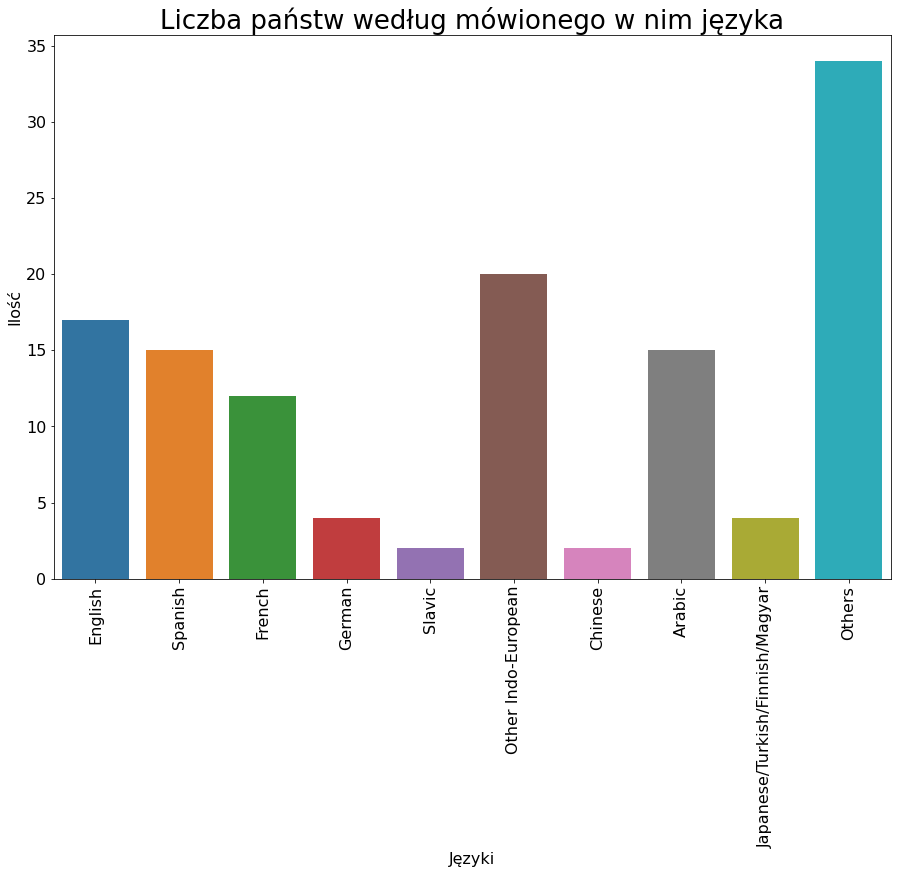

In [ ]:
xticks = list(range(10))
language = ['English', 'Spanish', 'French', 'German', 'Slavic', 
            'Other Indo-European', 'Chinese', 'Arabic', 'Japanese/Turkish/Finnish/Magyar', 'Others']

plt.figure(figsize = (15, 10))
ax = sns.countplot(df['language'])
plt.xlabel('Języki', size = 16)
plt.ylabel('Ilość', size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)
ax.set_xticks(xticks)
ax.set_xticklabels(language, minor=False, rotation = 90)
plt.title('Liczba państw według mówionego w nim języka', size = 26);

Następnie został przedstawiony wykres populacji i powierzchni państw o populacji większej od 30 milionów. 

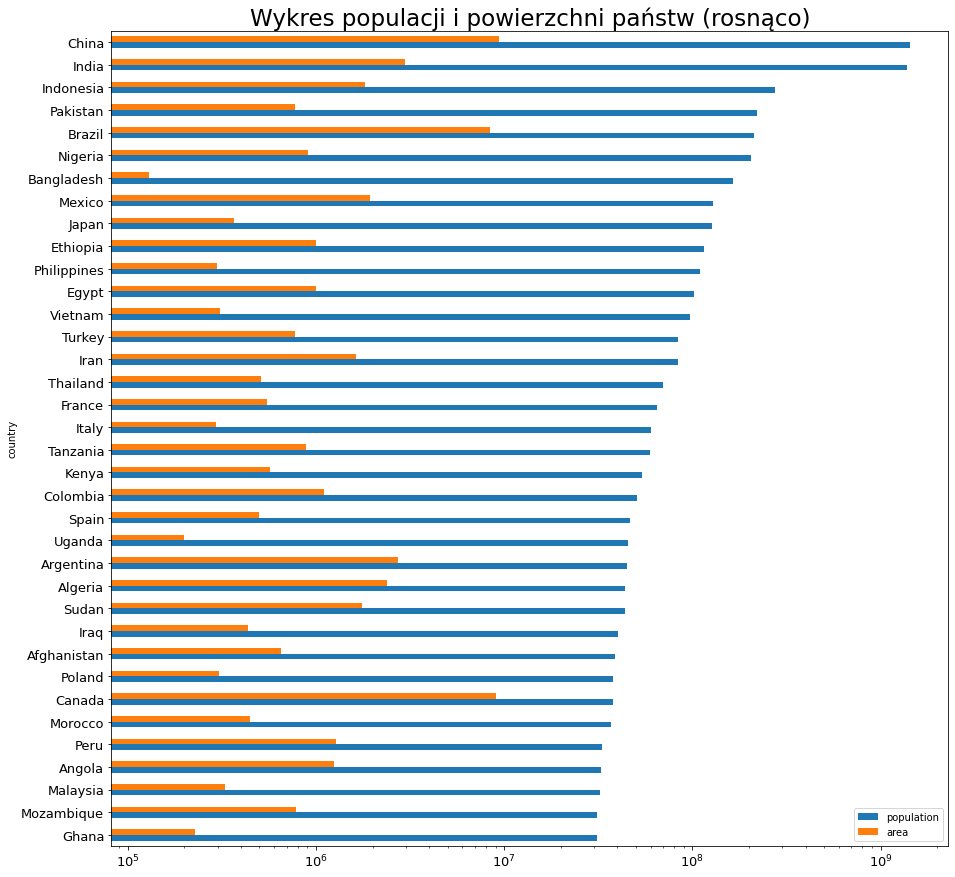

In [ ]:
panstwa = df.copy()
panstwa = panstwa.set_index('country')
panstwa = panstwa.loc[:, ['population','area']]
panstwa.dtypes
ax = panstwa[panstwa.population > 30e6].sort_values(by='population').plot(kind='barh', figsize=(15,15), fontsize=13, logx=True)
ax.set_title('Wykres populacji i powierzchni państw (rosnąco)', fontsize = 23);

**Wnioski z analizy wykresów liczby państw według mówionego języka oraz populacji i powierzchni państw:**
*   Z wykresu pierwszego widać, że językiem chińskim ludzie posługują się jedynie w dwóch krajach. Z analizy wykresu drugiego można zauważyć, że Chiny posiadają największą liczbę ludności. A więc językiem chińskim posługuje się dużo ludzi na jasno określonym obszarze jedynie dwóch krajów. Po połączeniu tych informacji można wywnioskować, że Chiny są krajem z kulturą ograniczoną do jednego miejsca, która w historii nie rozprzestrzeniała się w znaczącym stopniu na inne kraje i rozwijała się w obrębie własnych granic.  
*   Z wykresu  pierwszego wynika, że aż 17 krajów mówi językiem angielskim. Natomiast na wykresie, drugim kraj Anglia (lub Wielka Brytania) nawet nie występuje. Można z tego wywnioskować, że Anglia miała zupełnie inną historię niż Chiny. Musiała ona kiedyś rozpszestrzeniać swoją kulturę w bardzo znaczący sposób, natomiast aktualnie nie jest dominującą częścią społeczności posługującej się własnym językiem. 

Następnie przeprowadzona zostanie analiza występowania różnego rodzaju znaków  i kształtów na flagach państw. Podczas tej analizy zostanie przeprowadzona próba znalezienia pewnych zależności występowania znaków na fladze państwa od języka, religii, lub położenia geograficznego danego państwa. 

Wykresy przedstawiające liczbę państw z wybranymi znakami na fladze danego państwa. 

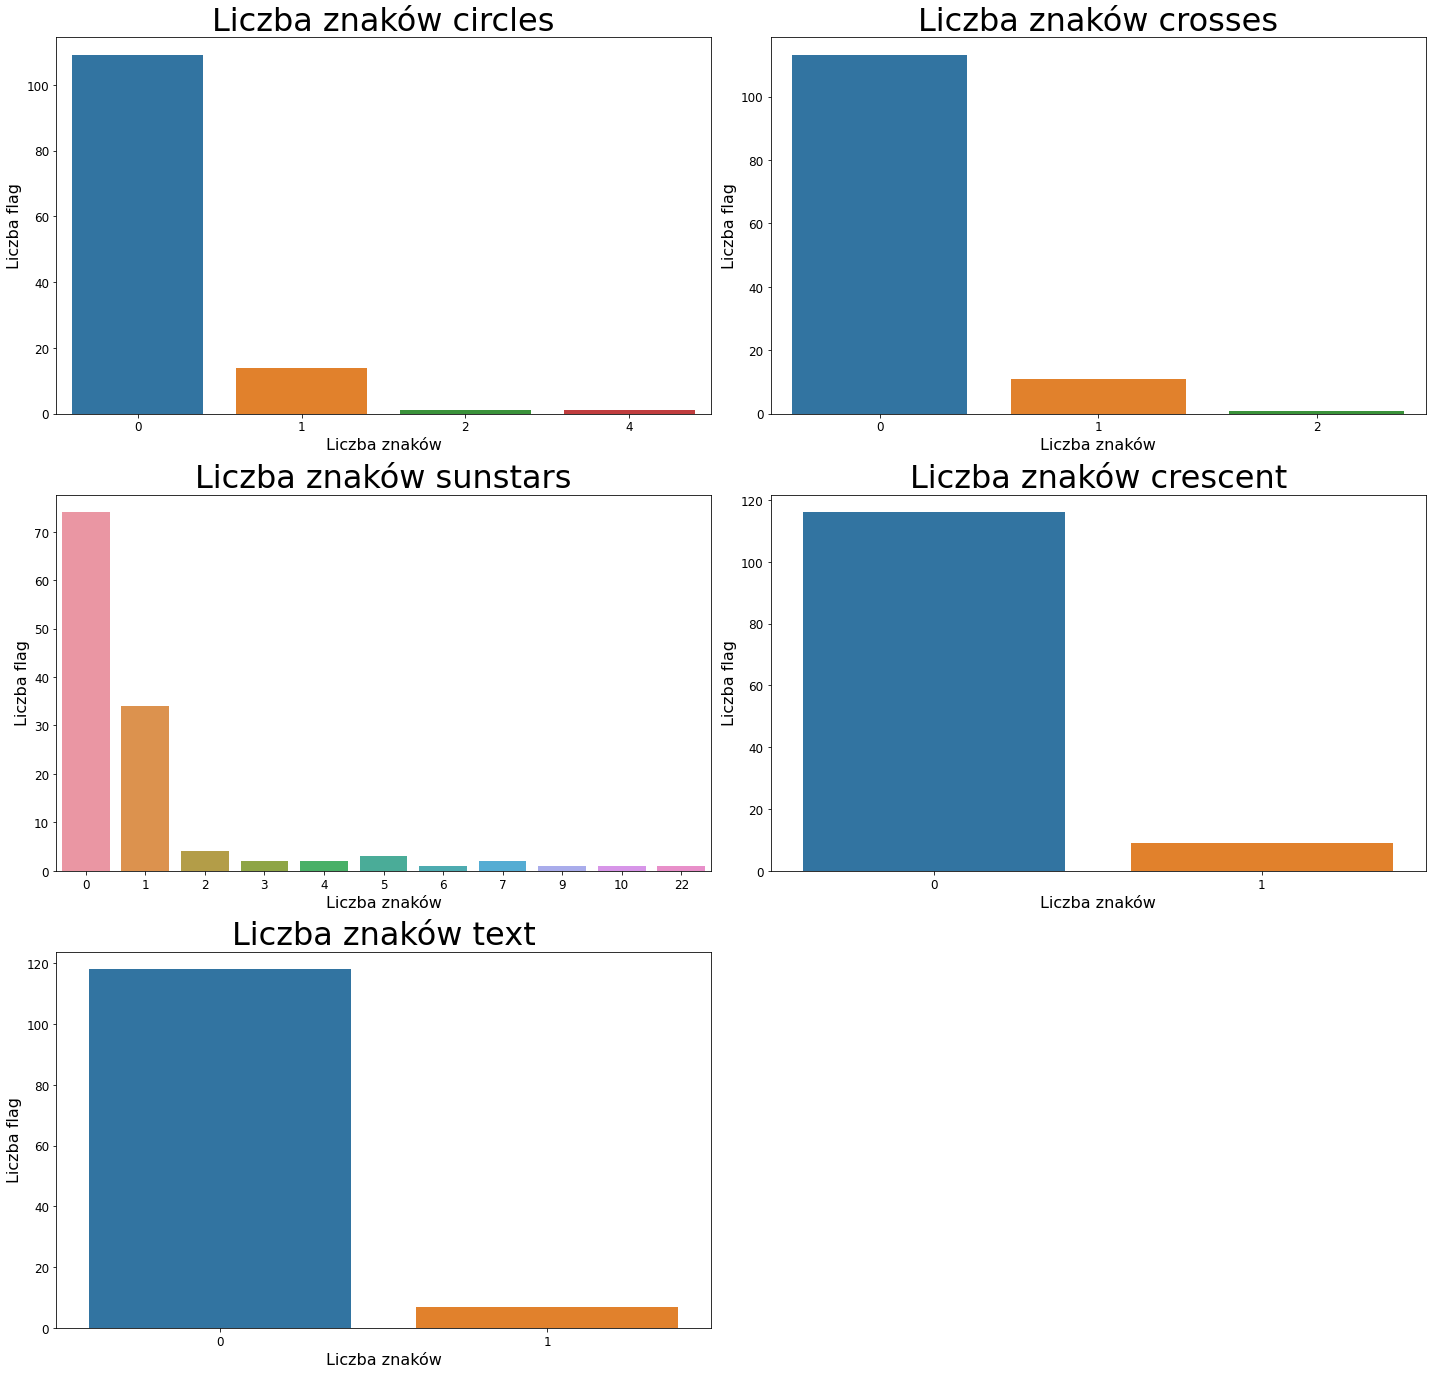

In [ ]:
signs = ['circles', 'crosses', 'sunstars', 'crescent', 'text']

position = 1
plt.figure(figsize=(20,25))

for i, sign in enumerate(signs):
  plt.subplot(4,2, position)
  plt.tight_layout()
  position += 1
  ax = sns.countplot(df[sign])
  plt.xlabel('Liczba znaków', size = 16)
  plt.ylabel('Liczba flag', size = 16)
  plt.xticks(size = 12)
  plt.yticks(size = 12)
  plt.title('Liczba znaków ' + sign, size = 32);

**Wnioski z analizy wykresów liczby państw z wybranymi znakami na fladze państwa:**
*   Różnego rodzaju znaki występują na flagach z małą częstością.
*   Najczęściej można się spotkać flagą zawierającą gwiazdki. Następnie relatywnie często można znaleźć kółka oraz krzyże. Najrzadziej na flagach występują znaki takie jak księżyc, lub tekst. 
*   W najbardziej zróżnicowanej liczbie na flagach występują gwiazdki, ponieważ ich liczba waha się od 1 aż do 22 gwiazdek na fladze. Jest to bardzo znaczna różnica w porównaniu do innych znaków, które głównie występują na flagach pojedynczo. Można więc wysunąć tezę, że gwiazdki na fladze mają pewne oddzielne znaczenie dla pojedynczych krajów i ich liczba jest uwarunkowana przez pewne indywidualne aspekty kulturowe, lub historyczne w państwie. Co zaś się tyczy reszty znaków, w których liczba znaków jest bardziej jednolita to możliwe jest, że liczba takich znaków jest zdefiniowana przez pewne międzynarodowe społeczności. Takie flagi (i znaki na nich) mogą wówczas mieć znaczenie związane bardziej z religią, lub położeniem geograficznym kraju, aniżeli z patriotyzmem.

In [ ]:
religions = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
languages = ['English', 'Spanish', 'French', 'German', 'Slavic', 'Other Indo-European', 'Chinese', 'Arabic', 'Japanese/Turkish/Finnish/Magyar', 'Others']
signs = ['circles','crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text']
landmasses = ['N.America', 'S.America', 'Europe', 'Africa', 'Asia', 'Oceania']

Wykresy przedstawiające liczbę krajów, w których się mówi określonym językiem zawierających określone kształty, gdzie ich różnorodność wynosi co najmniej 3.

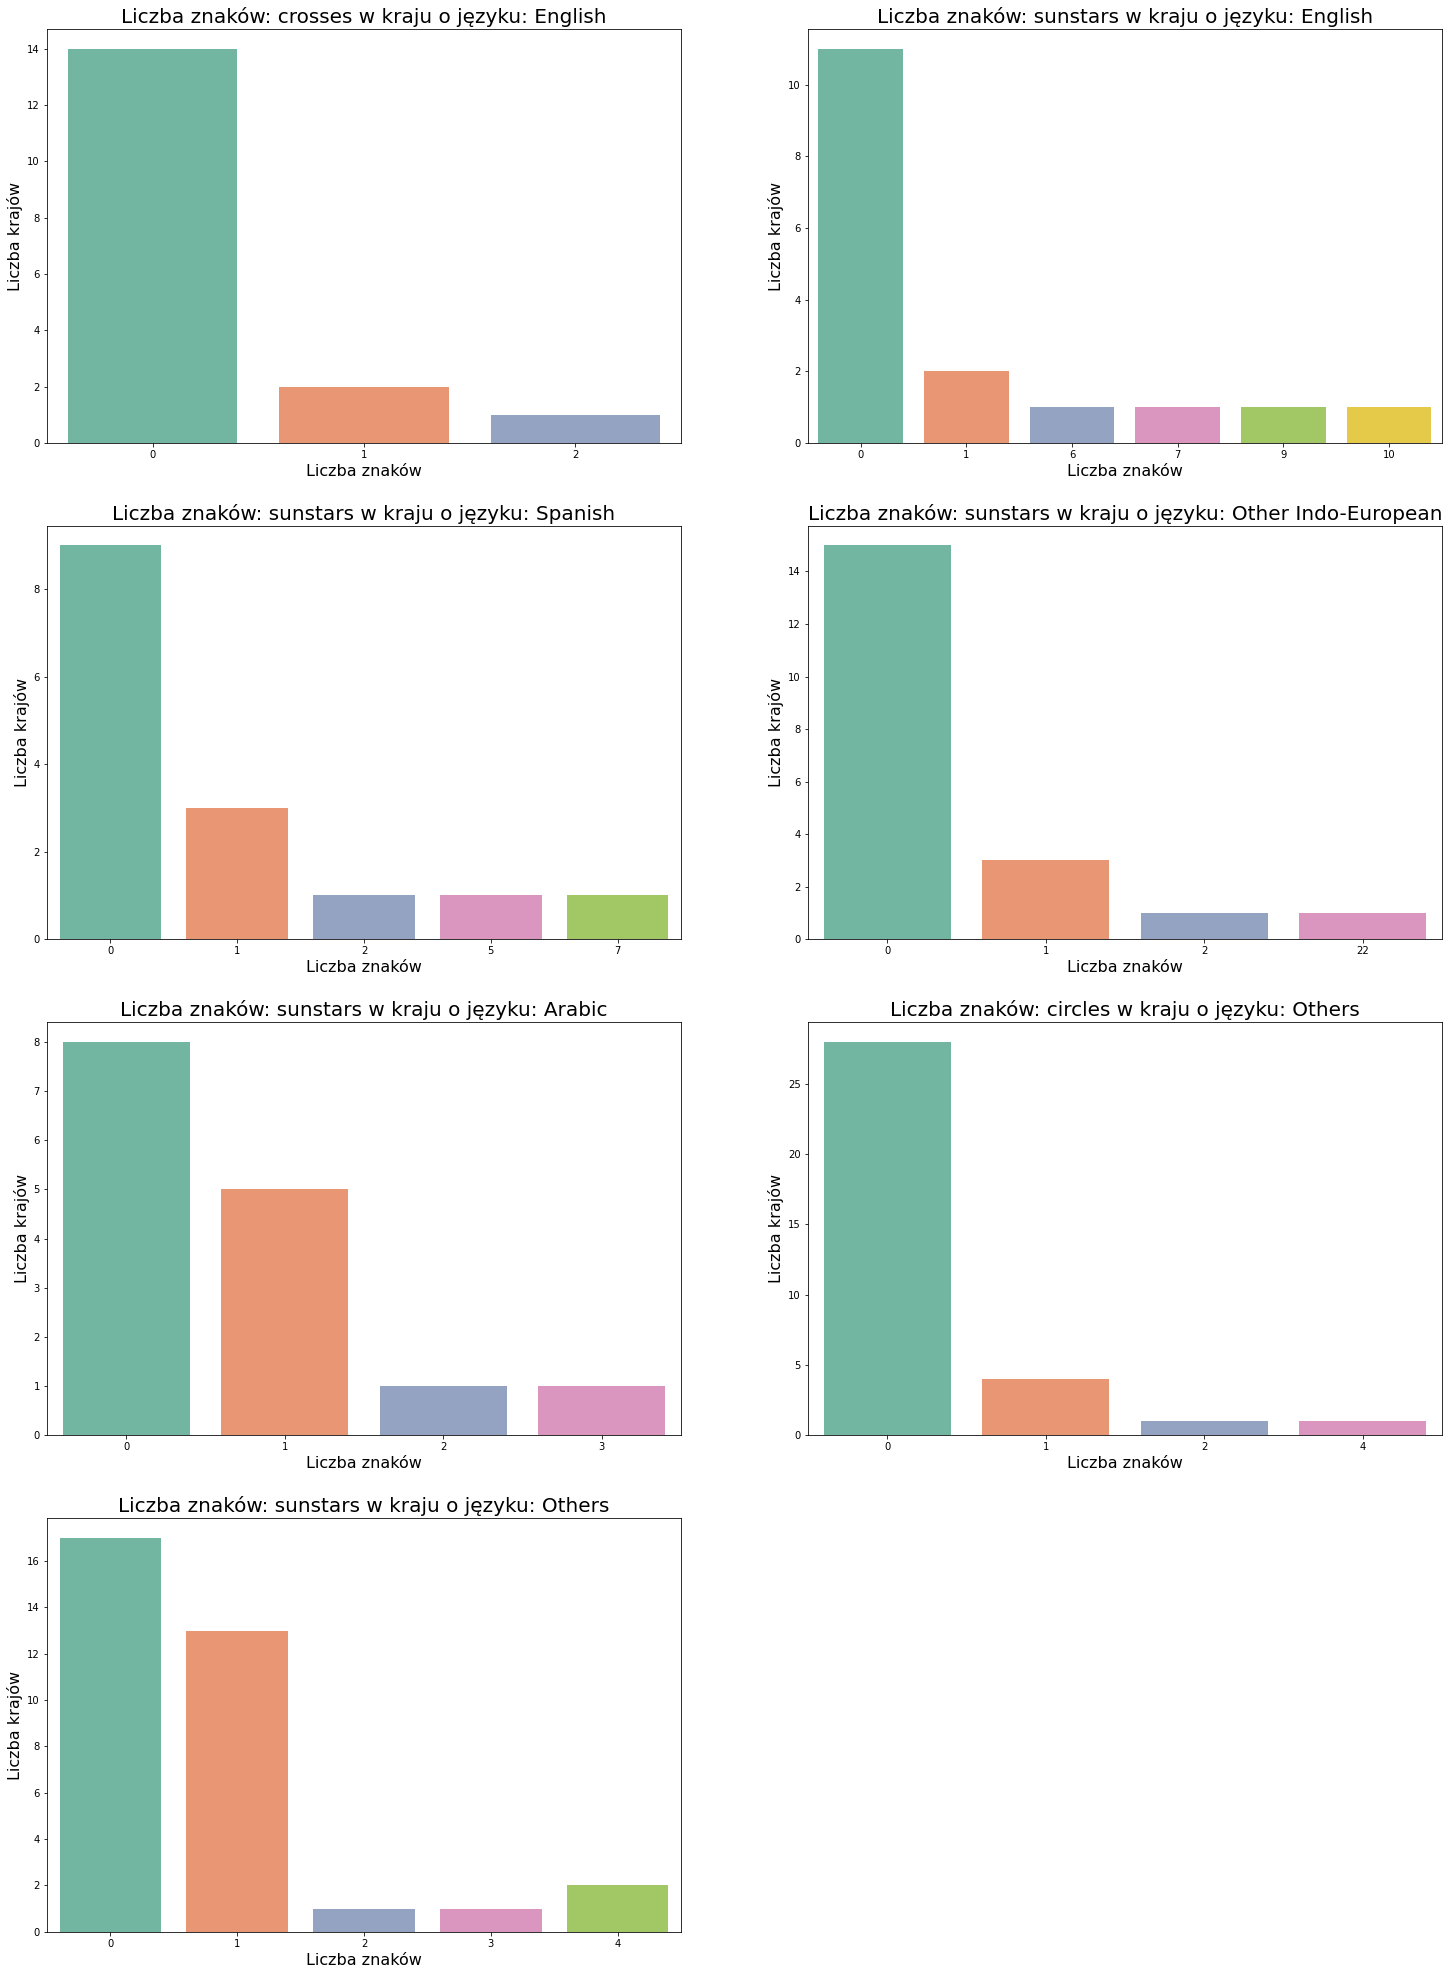

In [ ]:
position = 1
plt.figure(figsize=(25,35))

signs = ['circles', 'crosses', 'sunstars', 'crescent', 'text']

for i, language in enumerate(languages, 1):
  ldf = df.loc[df['language'] == i]
  for sign in signs:
    if len(np.unique(ldf[sign])) < 3:
      continue 
    plt.subplot(4, 2, position)
    ax = sns.countplot(ldf[sign], palette=sns.color_palette("Set2"))
    plt.xlabel('Liczba znaków', size = 16)
    plt.ylabel('Liczba krajów', size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.title('Liczba znaków: ' + sign + " w kraju o języku: " + language, size = 20);
    position += 1

**Wnioski z analizy wykresów zależności mówionego języka od znaków na fladze:**
*   Można zauważyć, że duża liczba flag z gwiazdkami o zróżnicowanej liczbie występuje w krajach, w których mówi się po angielsku i hiszpańsku. Podczas analizy wykresów liczby państw według mówionego języka oraz populacji i powierzchni państw zauważyliśmy, że w historii Wielkiej Brytanii prawdopodobnie miał miejsce epizod kolonializmu. Podobne wnioski można wysnuć o hiszpanii jako, że językiem hiszpańskim mowi się w 15 krajach. Te informacje w połączeniu z powyższymi wykresami mogą wskazywać, że wcześniej wysunięta teza mówiąca, że duże wahania liczby gwiazdek na fladze, mogą mieć znaczenie patriotyczne jest bliska prawdy. Niewykluczone, że gwiazdki te symbolizują pewne zdarzenia, lub daty dotyczące walki o niepodległość krajów będących koloniami Anglii i Hiszpanii.  
*   Widać, że w krajach z językiem arabskim oraz w krajach z językiem 'Others', na flagach często istnieje jedna gwiazdka. Może to być uwarunkowane położeniem geograficznym, lub religią w danych krajach.

Wykresy przedstawiające zależność liczbę krajów na konkretnym kontynecie od znaków na fladze.

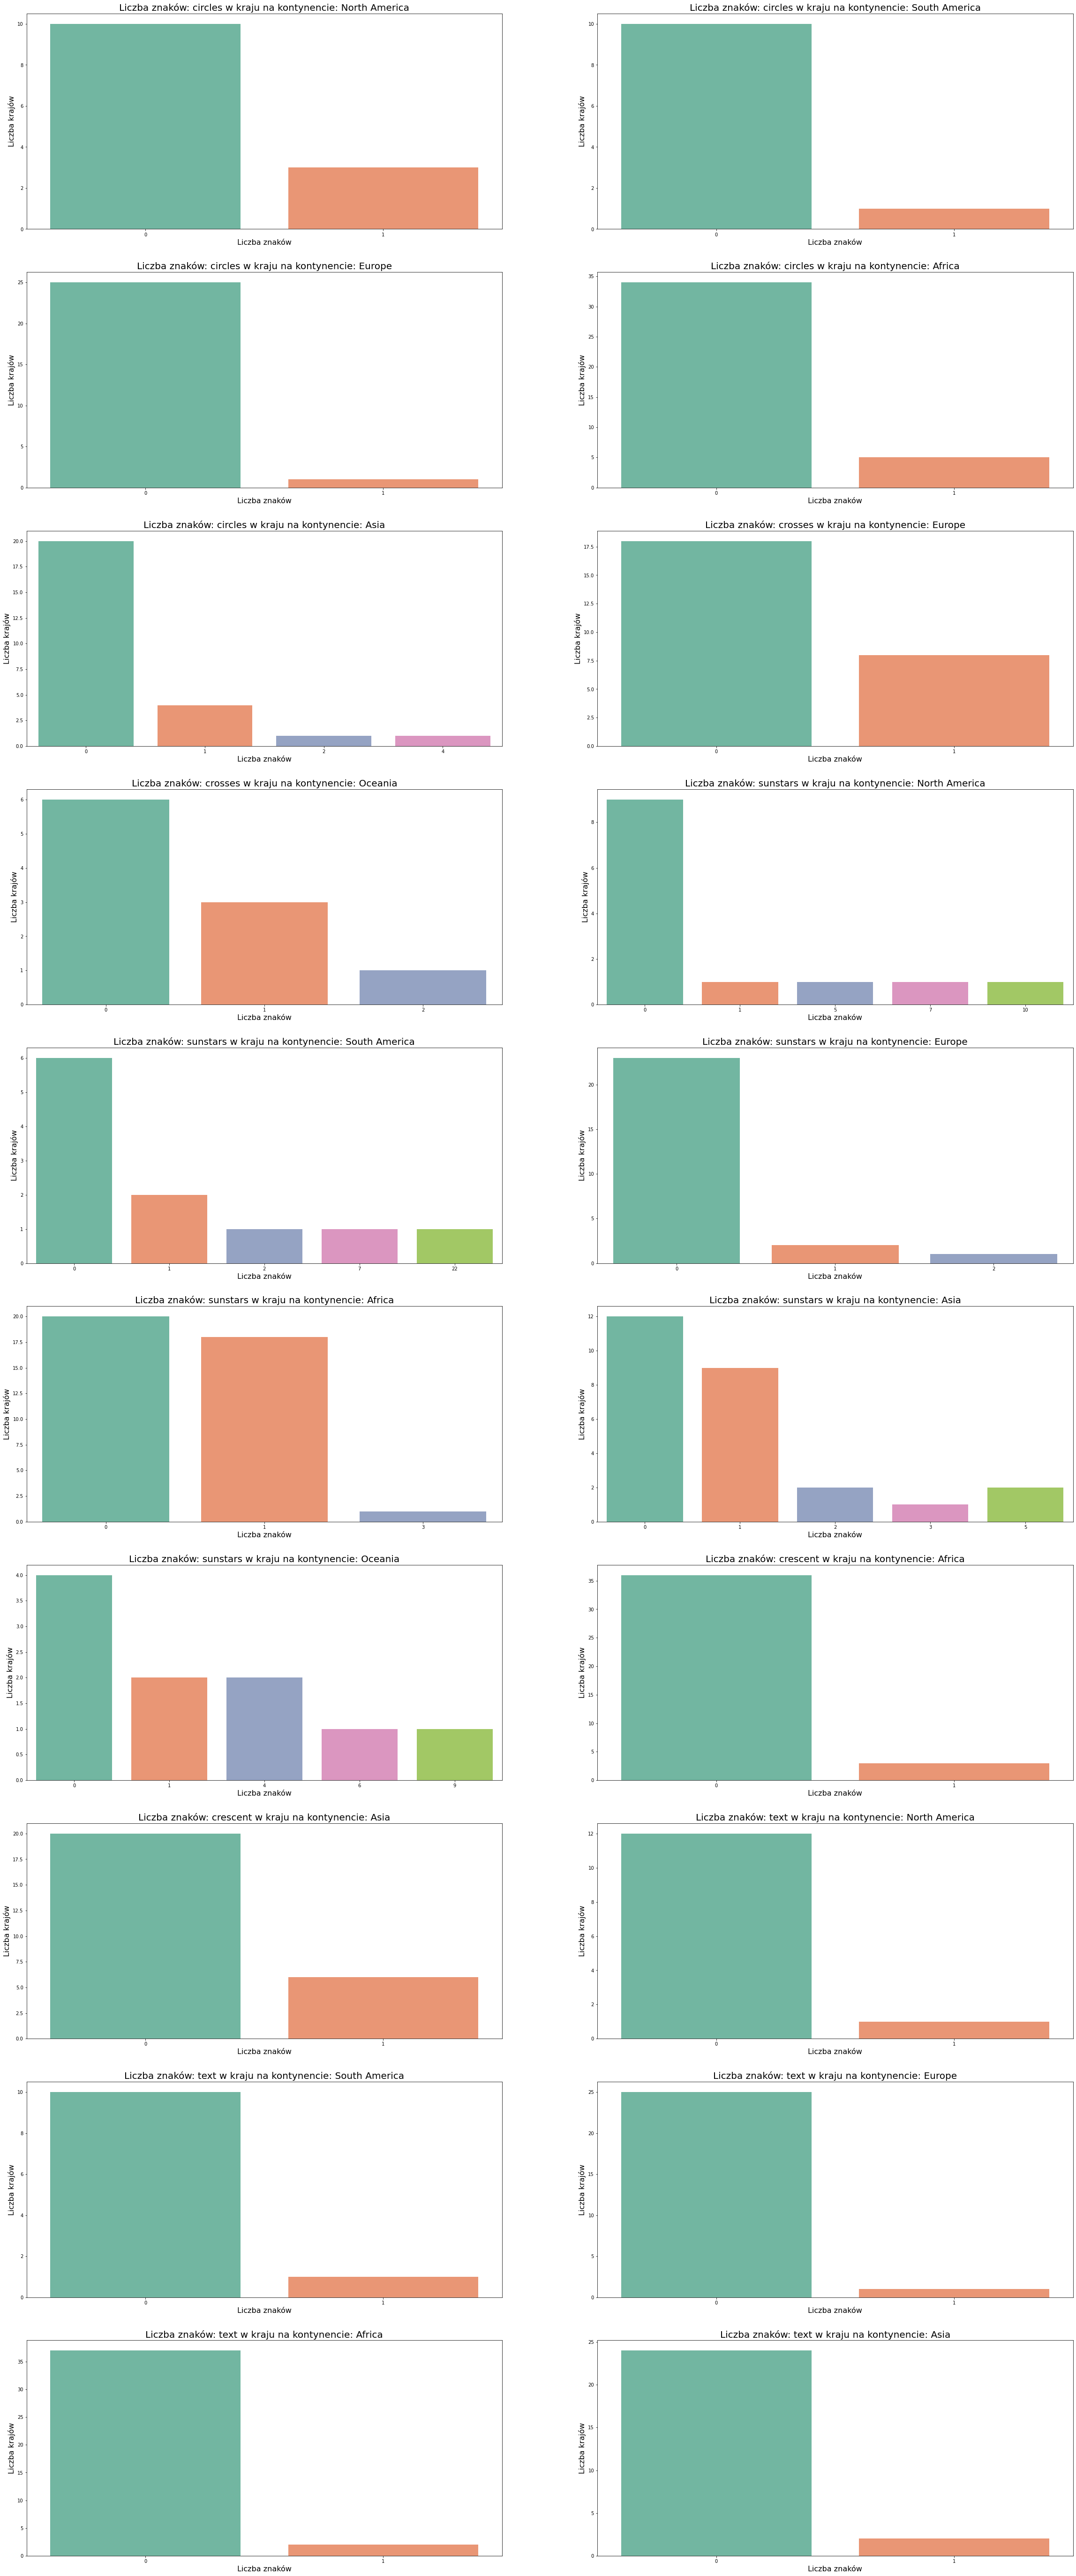

In [ ]:
position = 1
plt.figure(figsize=(40,120))

signs = ['circles', 'crosses', 'sunstars', 'crescent', 'text']

for sign in signs:
  for i, landmass in enumerate(landmasses, 1):
    ldf = df.loc[df['landmass'] == i]
    if len(np.unique(ldf[sign])) < 2:
      continue 
    plt.subplot(12, 2, position)
    ax = sns.countplot(ldf[sign], palette=sns.color_palette("Set2"))
    plt.xlabel('Liczba znaków', size = 16)
    plt.ylabel('Liczba krajów', size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.title('Liczba znaków: ' + sign + " w kraju na kontynencie: " + landmass, size = 20);
    position += 1

**Wnioski z analizy wykresów zależności liczby krajów na kontynencie od znaków na fladze:**
*   Można zauważyć, że w Europie znajduje się aż 8 krajów, które na swojej fladze zawierają jeden prosty krzyż. Może to wskazywać na fakt, że wzór tych flag wynika z religii Chrześcijańskiej i jej rozpowszechniania w Europie na przestrzeni lat. Ponadto widać, że proste krzyże na fladze znajdują się jeszcze na flagach w Oceanii (tylko na tych dwóch kontynentach). Wiedząc, że w Oceanii znajdują się kraje, w których mówi się językiem angielskim, można wywnioskować, że proste krzyże na flagach w tamtym regionie wynikają z kolonializmu Wielkiej Brytanii. 
*   Widać, że kraje o zróżnicowanej liczbie gwiazdek na fladze występują na kontynentach takich jak Ameryka Północna, Ameryka Południowa, Azja oraz Oceania. Ponownie można to uznać, za potwierdzenie tezy, że gwiazdki w oryginalnej liczbie na fladze mogą mieć związek z kolonializmem państw takich jak Wielka Brytania i Hiszpania. Kraje w których głównie się mówi w języku angielskim i hiszpańskim znajdują się bowiem właśnie na wyżej wymienionych kontynentach.  
*   Widać, że w Afryce prawie połowa flag zawiera jedną gwiazdkę. 


Następnie analizie zostały poddane flagi ze znakami takimi jak księżyce oraz tekst, ponieważ w obu przypadkach są to nieduże zbiory  i jest większe prawdopodobieństwo, że analiza takich zbiorów da bardziej jednolite wyniki. 

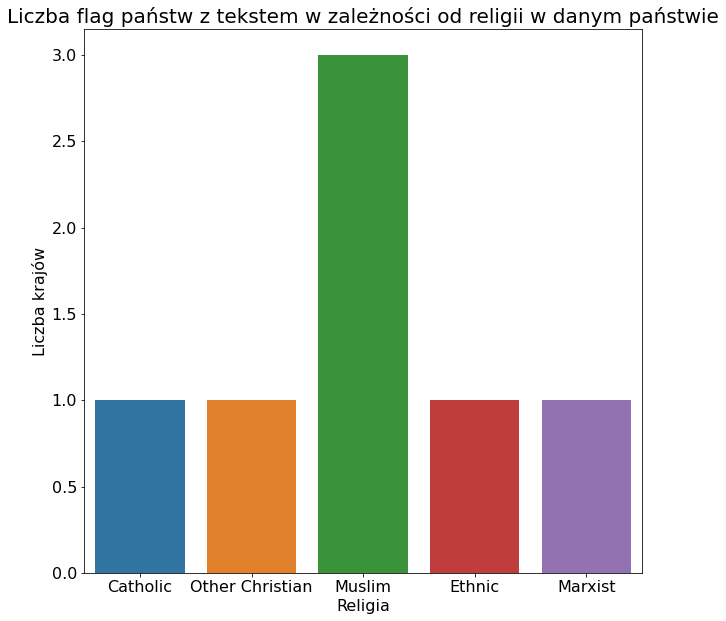

In [ ]:
plt.figure(figsize=(10,10))
ldf = df.loc[df['text'] == 1]

numeric_religons = np.unique(ldf['religion'])
named_religions = []
number = []
y = 0

for x in numeric_religons:
  named_religions.append(religions[x])
  number.append(y)
  y += 1

ax = sns.countplot(ldf['religion']);

plt.xlabel('Religia', size = 16)
plt.ylabel('Liczba krajów', size = 16)
plt.xticks(number, named_religions, size = 16)
plt.yticks(size = 16)
plt.title('Liczba flag państw z tekstem w zależności od religii w danym państwie', size = 20);

**Wnioski z wykresu flag z tekstem w zależności od religii w państwie:**
*  Można zauważyć, że jeśli na fladze występuje tekst to taka flaga prawdopodobnie należy do kraju, w którym dominuje religia muzułmańska.   

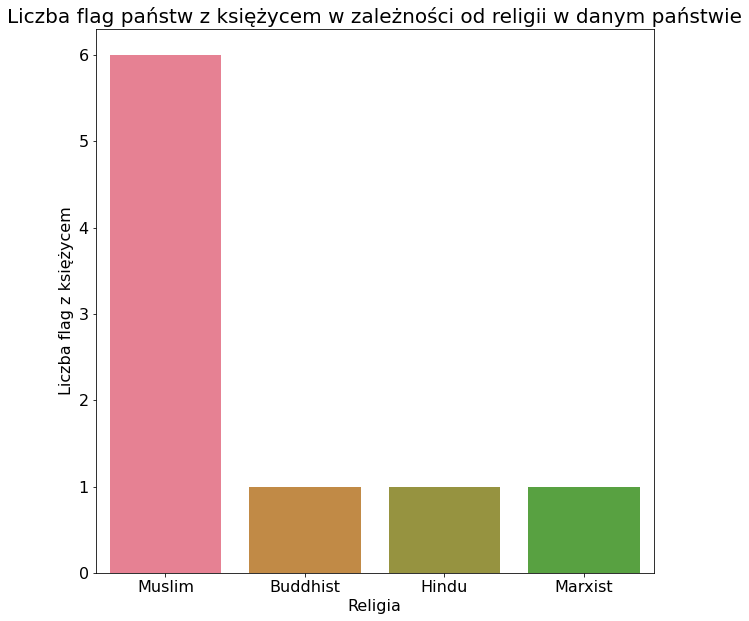

In [ ]:
ldf = df.loc[df['crescent'] == 1]
numeric_religons = np.unique(ldf['religion'])
named_religions = []
number = []
y = 0

for x in numeric_religons:
  named_religions.append(religions[x])
  number.append(y)
  y += 1

plt.figure(figsize=(10,10))
ax = sns.countplot(ldf['religion'], palette=sns.color_palette("husl", 9))
plt.xlabel('Religia', size = 16)
plt.ylabel('Liczba flag z księżycem', size = 16)
plt.xticks(number, named_religions,size = 16)
plt.yticks(size = 16)
plt.title('Liczba flag państw z księżycem w zależności od religii w danym państwie', size = 20);

**Wnioski z analizy wykresu flag z księżycem w zależności od religii w państwie:**
*   Widać, że flagi zawierające księżyc aż w 67% należą do krajów z religią muzułmańską. Mimo, że zbiór takich flag nie jest bardzo duży to wydaje się być bezpiecznym stwierdzenie, że w istocie księżyc na fladze ma związek z religią muzułmańską. Można ponadto uogólnić ten wniosek, aby zachodził z jeszcze większym prawdopodobieństwem i uznać, że księżyc na fladze aż w 89% oznacza, że kraj z taką flagą jest krajem z religią pochodzącą z Azji. 



W celu znalezienia relacji między religiami, a mówionym językiem w danym kraju, została stworzona macierz korelacji. 

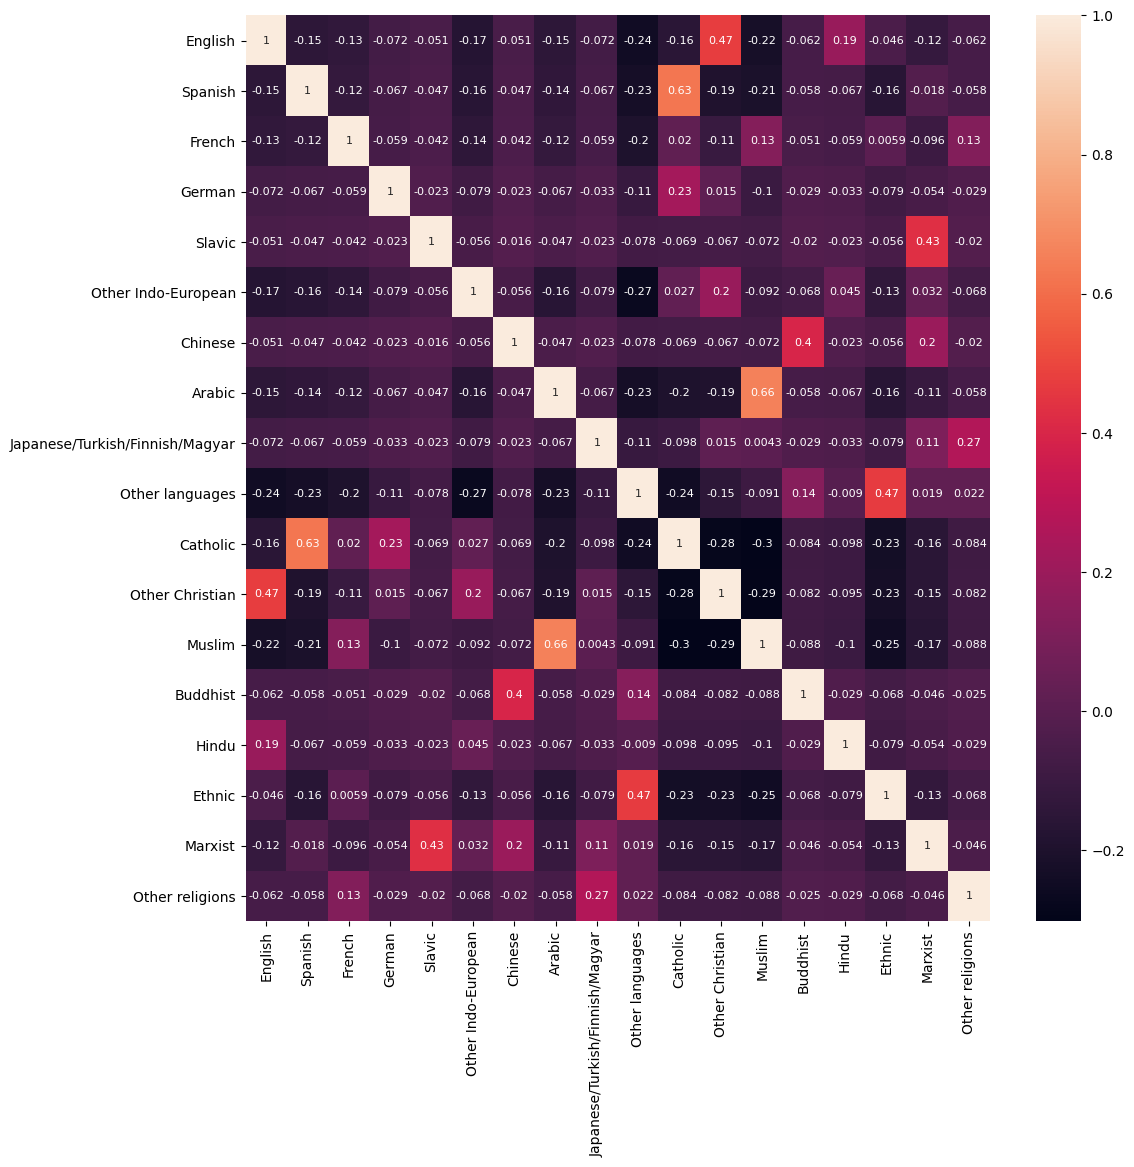

In [ ]:
rdf = pd.DataFrame(columns = ['English', 'Spanish', 'French', 'German', 'Slavic', 'Other Indo-European', 'Chinese', 'Arabic', 'Japanese/Turkish/Finnish/Magyar', 'Other languages', 
                              'Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Other religions'])
rdf['English'] = (df['language'] == 1)
rdf['Spanish'] = (df['language'] == 2)
rdf['French'] = (df['language'] == 3)
rdf['German'] = (df['language'] == 4)
rdf['Slavic'] = (df['language'] == 5)
rdf['Other Indo-European'] = (df['language'] == 6)
rdf['Chinese'] = (df['language'] == 7)
rdf['Arabic'] = (df['language'] == 8)
rdf['Japanese/Turkish/Finnish/Magyar'] = (df['language'] == 9)
rdf['Other languages'] = (df['language'] == 10)
rdf['Catholic'] = (df['religion'] == 0)
rdf['Other Christian'] = (df['religion'] == 1)
rdf['Muslim'] = (df['religion'] == 2)
rdf['Buddhist'] = (df['religion'] == 3)
rdf['Hindu'] = (df['religion'] == 4)
rdf['Ethnic'] = (df['religion'] == 5)
rdf['Marxist'] = (df['religion'] == 6)
rdf['Other religions'] = (df['religion'] == 7)

plt.figure(figsize=(12,12),dpi = 100)
sns.heatmap(rdf.corr(),annot = rdf.corr(), annot_kws={"size": 8});

Analizując powyższą macierz korelacji można zauważyć pewne zależności między religiami i językami:
* Muslim – Arabic [0,66]
* Catholic – Spanish [0,63]
* Other Christian – English [0,47]
* Marxist – Slavic [0,43]
* Buddhist – Chinese [0,4]

Za pomocą poniższych wykresów, przedstawiających liczbę państw z określonym językiem w zależności od religii zostało sprawdzone, czy rzeczywiście istnieją powyższe relacje. 

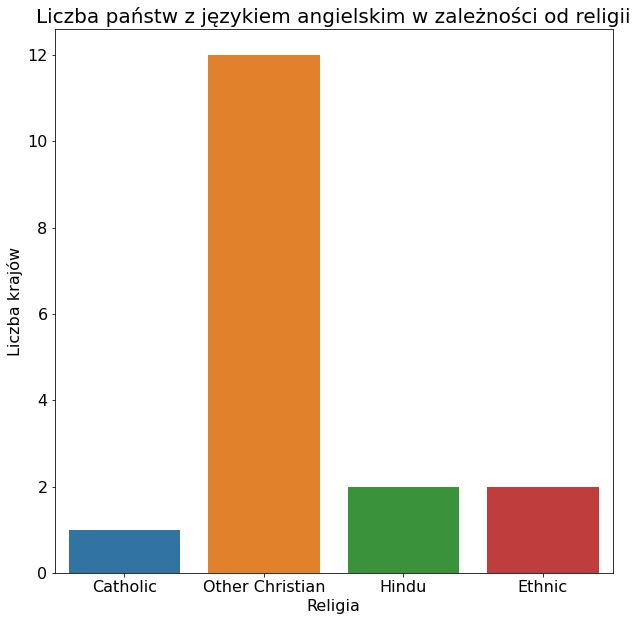

In [ ]:
plt.figure(figsize=(10,10))
ldf = df.loc[df['language'] == 1]

numeric_religons = np.unique(ldf['religion'])
named_religions = []
number = []
y = 0

for x in numeric_religons:
  named_religions.append(religions[x])
  number.append(y)
  y += 1

ax = sns.countplot(ldf['religion'])

plt.xlabel('Religia', size = 16)
plt.ylabel('Liczba krajów', size = 16)
plt.xticks(number, named_religions, size = 16)
plt.yticks(size = 16)
plt.title('Liczba państw z językiem angielskim w zależności od religii', size = 20);

**Wnioski z analizy wykresu liczby państw z językiem angielskim w zależności od religii:**
*   Z powyższego wykresu wynika, że język angielski w 70.6% implikuje religię będącą innym odłamem chrześcijaństwa niż katolicyzm. Wynik ten jest oparty na analizie zbioru 17 krajów anglojęzycznych, więc korelacja jest dosyć silna. Można z tego wywnioskować, że Wielka Brytania w okresie kolonizacji w dosyć dużym stopniu wpłynęła na religię w krajach, które podbiła.




Liczba krajów, w których mówi się językiem hiszpańskim: 15


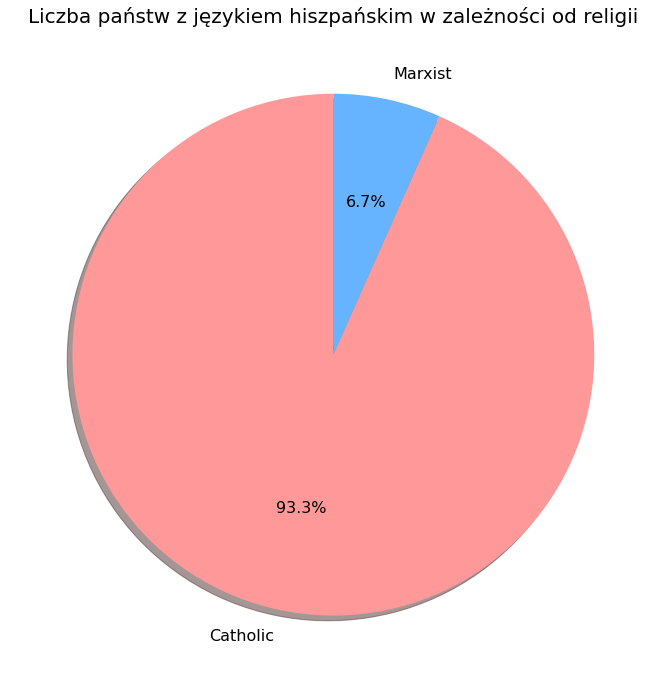

In [ ]:
sizes = [93.34, 6.66]
labels = ['Catholic', 'Marxist']
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots(figsize=(12, 12))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,  startangle=90, textprops={'fontsize': 16}, colors=colors)

plt.title('Liczba państw z językiem hiszpańskim w zależności od religii', size = 20);

df_temp = df.loc[df['language'] == 2]
df_temp = df_temp.loc[(df['religion'] == 0) | (df['religion'] == 6)]
suma = df_temp.shape[0]
print('Liczba krajów, w których mówi się językiem hiszpańskim: ' + str(suma))

**Wnioski z analizy wykresu liczby państw z językiem hiszpańskim w zależności od religii:**
*   Z powyższego wykresy wynika, że język hiszpański w 93.3% implikuje religię Katolicką. Takich krajów jest 15, więc korelacja jest silna. Może z tego wynikać wniosek, że Hiszpania w okresie kolonizacji w dużym stopniu wpłynęła na religię w krajach, które podbiła.



Liczba krajów, w których mówi się językiem arabskim oraz jest wyznawana religia muzułmańska: 15


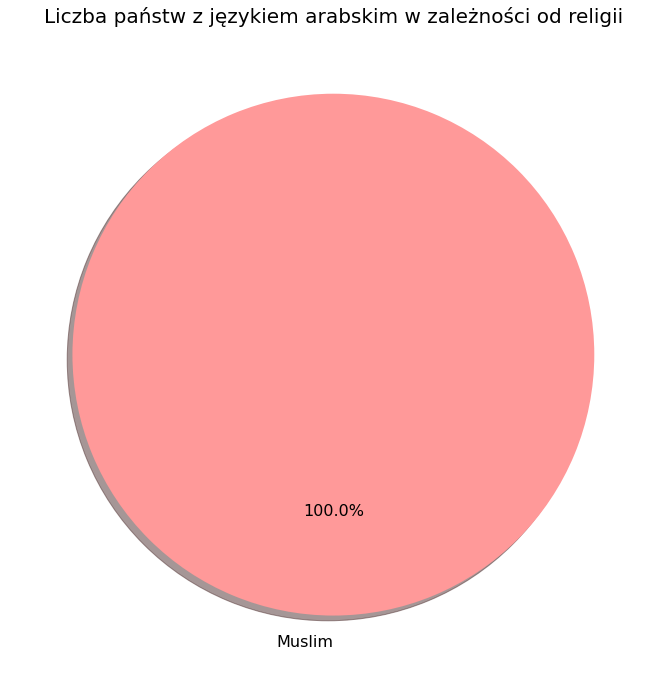

In [ ]:
sizes = [100]
labels = ['Muslim']
colors = ['#ff9999']
fig1, ax1 = plt.subplots(figsize=(12, 12))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,  startangle=90, textprops={'fontsize': 16}, colors=colors)

plt.title('Liczba państw z językiem arabskim w zależności od religii', size = 20)

df_temp = df.loc[df['language'] == 8]
df_temp = df_temp.loc[df['religion'] == 2]
suma = df_temp.shape[0]
print('Liczba krajów, w których mówi się językiem arabskim oraz jest wyznawana religia muzułmańska: ' + str(suma))

**Wnioski z analizy wykresu liczby państw z językiem arabskim w zależności od religii:**
*   Z powyższego wykresu wynika, że język arabski w 100% implikuje religię muzułmańską. We wszystkich krajach, w których mówi się językiem arabskim dominuje religia muzułmańska. Takich krajów jest aż 15, więc jest ta korelacja jest bardzo silna.   



Liczba krajów, w których mówi się językiem chińskim: 2


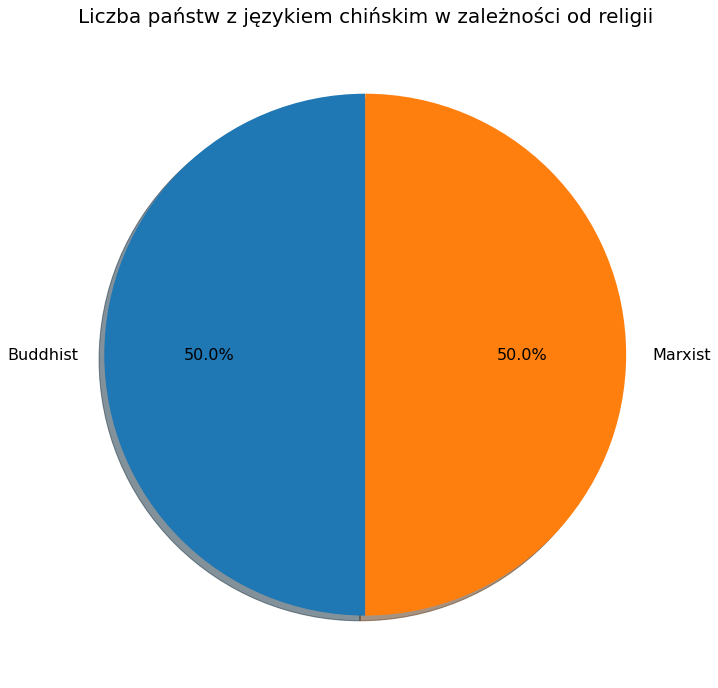

In [ ]:
sizes = [50, 50]
labels = ['Buddhist', 'Marxist']
fig1, ax1 = plt.subplots(figsize=(12, 12))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,  startangle=90, textprops={'fontsize': 16})

plt.title('Liczba państw z językiem chińskim w zależności od religii', size = 20);

df_temp = df.loc[df['language'] == 7]
df_temp = df_temp.loc[(df['religion'] == 6) | (df['religion'] == 3)]
suma = df_temp.shape[0]
print('Liczba krajów, w których mówi się językiem chińskim: ' + str(suma))

**Wnioski z analizy wykresu liczby państw z językiem chińskim w zależności od religii:**
*   Z macierzy korelacji wynikało, że mogła istnieć pewna zależność między językiem chińskim, a religią buddyjską. Okazało się jednak, że taka hipoteza była zupełnia nietrafiona, ponieważ językiem chińskim mówi się zaledwie w dwóch krajach i w obu tych krajach występuje inna religia –  w jednym religia buddyjska, a w drugim marksizm.



Liczba krajów, w których mówi się językiem słowiańskim oraz jest wyznawana religia marksistowska: 2


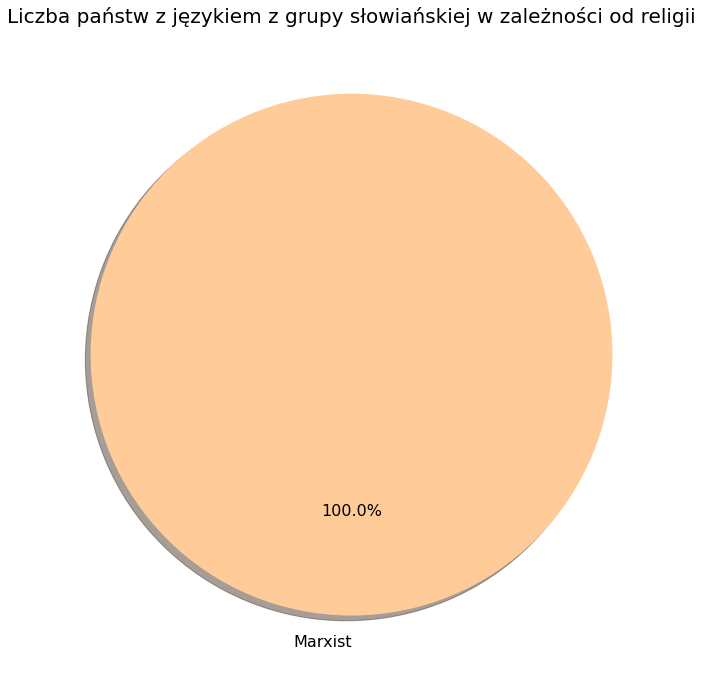

In [ ]:
sizes = [100]
labels = ['Marxist']
colors = ['#ffcc99']
fig1, ax1 = plt.subplots(figsize=(12, 12))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,  startangle=90, textprops={'fontsize': 16}, colors=colors)

plt.title('Liczba państw z językiem z grupy słowiańskiej w zależności od religii', size = 20);

df_temp = df.loc[df['language'] == 5]
df_temp = df_temp.loc[df['religion'] == 6]
suma = df_temp.shape[0]
print('Liczba krajów, w których mówi się językiem słowiańskim oraz jest wyznawana religia marksistowska: ' + str(suma))

**Wnioski z analizy wykresu liczby państw z językiem słowiańskim w zależności od religii:**
*   Z macierzy pomyłek wynikało, że istnieje pewna zależność między krajami z językiem z grupy słowiańskiej, a marksizmem. Podobnie jednak jak w przypadku języka chińskiego okazało się, że w zbiorze danych istnieją jedynie dwa kraje z językim słowiańskim. Jest to zbyt mała liczba, by móc wyciągnąć prawdopodobne wnioski o takiej zależności. Niemniej okazało się, że w obu tych krajach wystepuję marksizm. 
*   Ciekawym odkryciem okazał się fakt, że jednym z tych krajów jest Polska. 



Text(0.5, 1.0, 'Liczebność poszczególnych religii, na konkretnych kontynentach')

<Figure size 432x288 with 0 Axes>

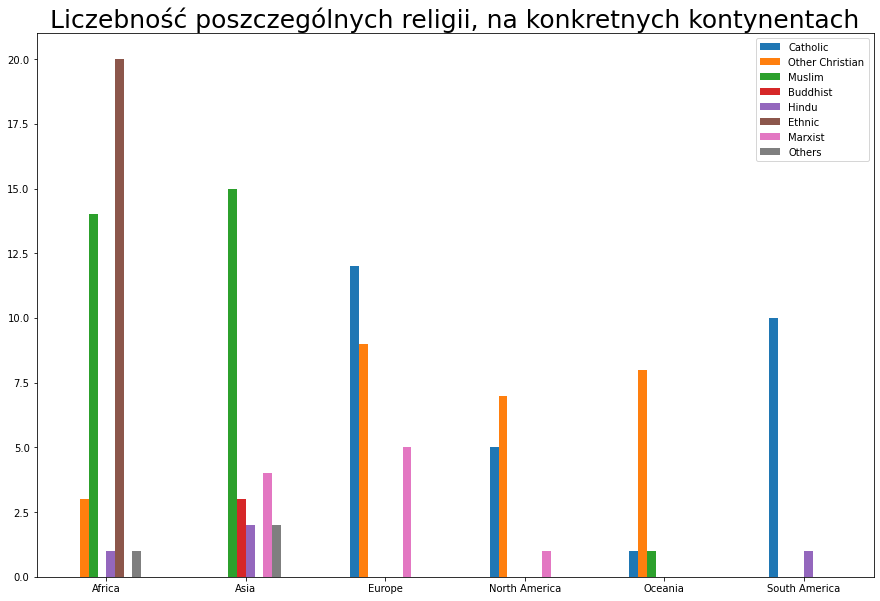

In [ ]:
plt.figtext(.5,.8,'Humidity',fontsize=40,ha='center')
plt.figtext(.5,.9,'Temperature', fontsize=100, ha='center')

dfd = df.copy()
dfd = dfd.set_index('landmass')

landmasses = ['North America', 'South America', 'Europe', 'Africa', 'Asia', 'Oceania']
religions = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
dfd.index = [ landmasses[index-1] for index in dfd.index ]

dfd = dfd.loc[:, 'religion']
dfd = pd.DataFrame(dfd)
dfd = pd.get_dummies(dfd['religion'])
dfd.columns = religions
d = dfd.groupby(dfd.index).agg('sum')
ax = d.plot.bar(rot=0, figsize=(15,10))
ax.set_title('Liczebność poszczególnych religii na konkretnych kontynentach',fontsize= 25)

**Wnioski z analizy wykresu liczebności poszczególnych religii na konkretnych kontynentach**
*   Na powyższym wykresie widać, że w Europie, Ameryce Północnej i Oceanii jednymi z dominujących religii są odłamy chrześcijaństwa. Poza tym w Europie, Ameryce Pólnocnej i Południowej jedną z dominujących religii jest katolicyzm. Ponownie wskazuje to na duży wpływ kolonializmu Wielkiej Brytanii oraz Hiszpanii na religię w krajach podbitych. 
*   Widać, że w Afryce dominującymi religiami są religie etniczne.



# **Modelowanie**


---




## **Uczenie nienadzorowane**

---



Do uczenia nienadzorowanego zostały użyte elementy bibliotek scipy oraz scikit.learn. Zaimportowano z nich m.in. metody potrzebne do stworzenia dendrogramów.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans

Najpierw zostały przeprowadzone próby znalezienia najbardziej obiecujących atrybutów, które pozwoliłyby na stworzenie kilku klas na podstawie wykresu obszaru od populacji danego kraju.

<Figure size 576x576 with 0 Axes>

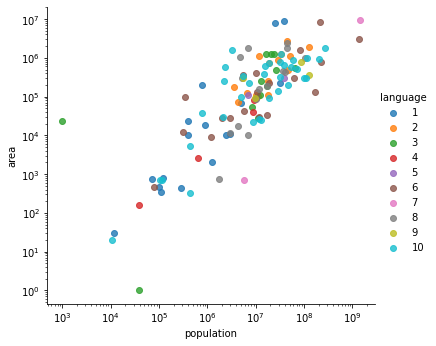

<Figure size 576x576 with 0 Axes>

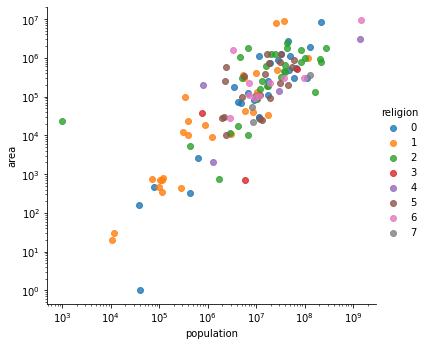

<Figure size 576x576 with 0 Axes>

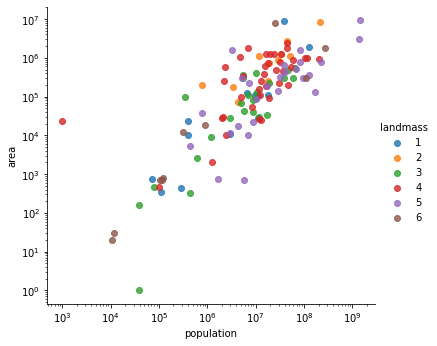

<Figure size 576x576 with 0 Axes>

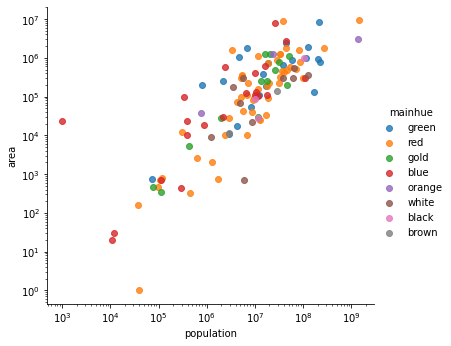

<Figure size 576x576 with 0 Axes>

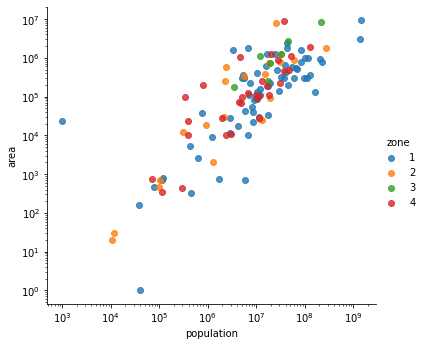

In [ ]:
possible_categories=['language', 'religion', 'landmass', 'mainhue', 'zone']

for category in possible_categories:
  plt.figure(figsize = (8,8))
  ax = sns.lmplot(x='population', y='area', data=df, hue=category, fit_reg=False ,legend=True)
  ax.set(xscale='log')
  ax.set(yscale='log')

Następnie zostały dobrane atrybuty colours i sunstars, aby spróbować ponownie wydzielić klasy, tym razem dla atrybutów, które miały mniejszą różnice między wartościami skrajnymi.

<Figure size 576x576 with 0 Axes>

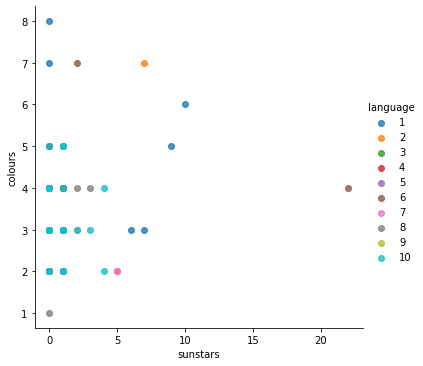

<Figure size 576x576 with 0 Axes>

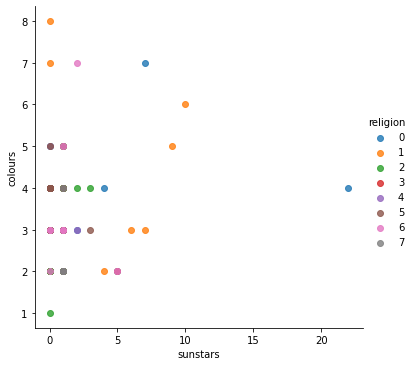

In [ ]:
possible_categories=['language', 'religion']

for category in possible_categories:
  plt.figure(figsize = (8,8))
  ax = sns.lmplot(x='sunstars', y='colours', data=df, hue=category, fit_reg=False ,legend=True)

Później zostały wykonane podobne kroki, tym razem dla atrybutów, których rzędy wielkości różniły się w znacznym stopniu.

<Figure size 576x576 with 0 Axes>

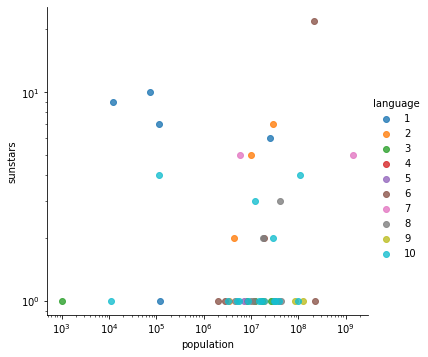

<Figure size 576x576 with 0 Axes>

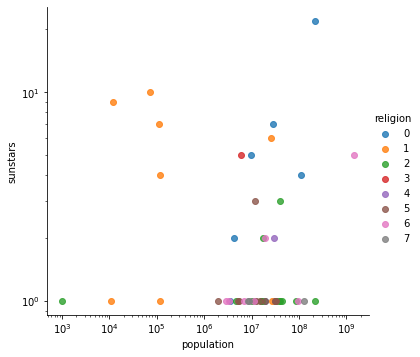

<Figure size 576x576 with 0 Axes>

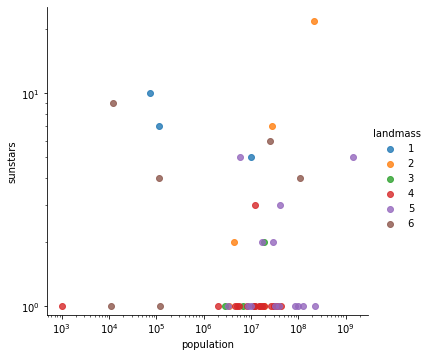

<Figure size 576x576 with 0 Axes>

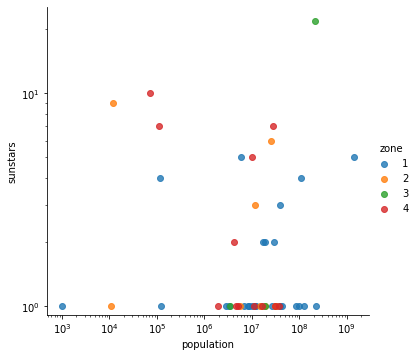

In [ ]:
possible_categories=['language', 'religion', 'landmass', 'zone']

for category in possible_categories:
  plt.figure(figsize = (8,8))
  ax = sns.lmplot(x='population', y='sunstars', data=df, hue=category, fit_reg=False ,legend=True)
  ax.set(xscale='log')
  ax.set(yscale='log')

Po głębokiej analizie wszystkich wyżej pokazanych wykresów doszliśmy do wniosku, że najbardziej odpowiednim wykresem będzie wykres obszaru od populacji kraju, a atrybutem język. Jednakże widać na wszystkich wykresach, że nie ma wyraźnego podziału testowanych atrybutów, a więc klasyfikacja może nie dać najlepszych rezultatów

Wybrane atrybuty:


*   population
*   area



<Figure size 576x576 with 0 Axes>

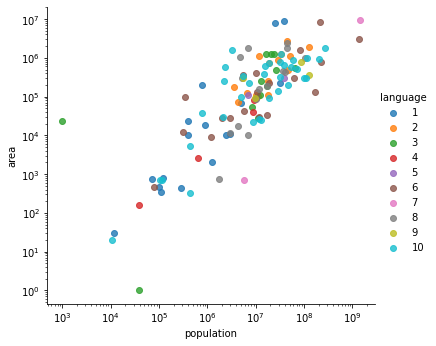

In [ ]:
plt.figure(figsize = (8,8))
ax = sns.lmplot(x='population', y='area', data=df, hue='language', fit_reg=False ,legend=True)
ax.set(xscale='log')
ax.set(yscale='log')

Po wybraniu odpowiednich atrybutów, dokonaliśmy podziału na klasy za pomocą dendrogramu i czterech metod grupowanie hierarchicznego.

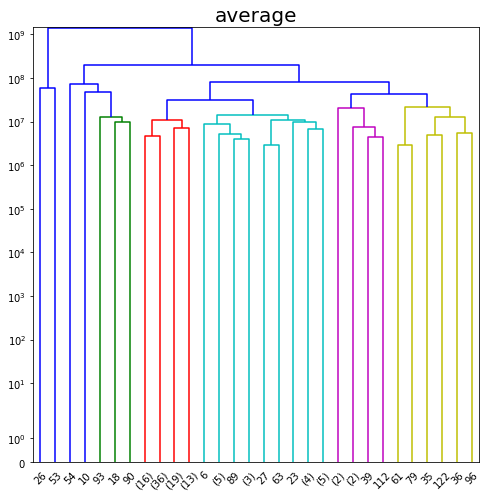

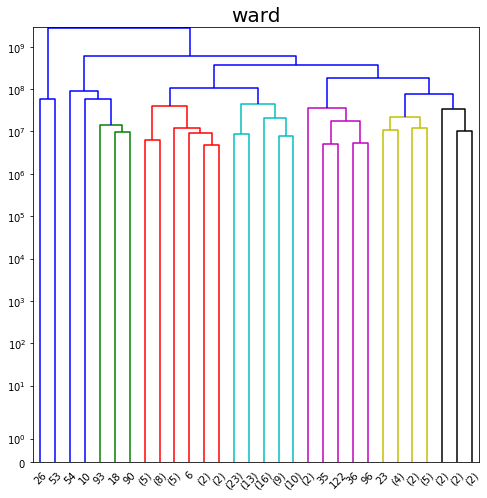

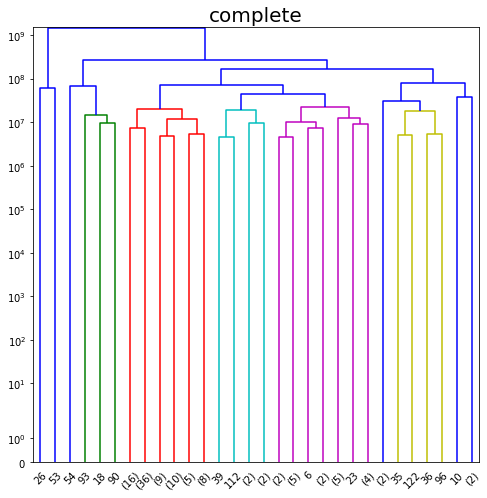

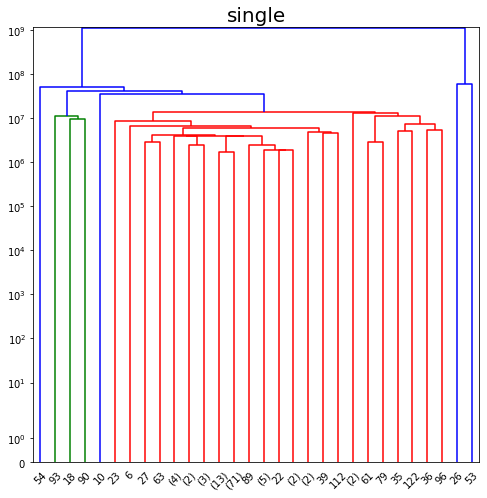

In [ ]:
df_class = df.loc[:, ['population', 'area', 'language']]
df_noclass = df_class.loc[:, ['population', 'area']]
metrics=['average','ward', 'complete', 'single' ]
prog_proc = 2


for method in metrics:
  plt.figure(figsize = (8,8))
  grupy = linkage(df_noclass, method=method, metric='euclidean')
  prog = prog_proc*max(grupy[:,2])/100
  cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
  df_noclass['grupa'] =  fcluster(grupy, prog, criterion = 'distance')
  ax = plt.gca()
  plt.scatter(x = df_noclass['population'], y = df_noclass['area'], c = df_noclass['grupa'])
  ax.set_yscale('symlog')
  ax.set_title(method, fontsize=20)

Patrząc na dendrogramy i ich rezultaty, wnioskujemy, że sposób wyznaczania odległości międzygrupowej 'ward' jest jedną z lepszych dzielących dane, ponieważ dzieli ona dane na podobną ilość grup jaką mamy w rzeczywistości.

Później dokonaliśmy ponownie grupowania hierarchicznego, tym razem zostało to przedstawiona na odpowiednich wykresach. Zostało ono przeprowadzone dla 10 klas, gdyż pierwotny atrybut language także posiada 10 klas. Pod każdym wykresem została także przedstawiona macierz pomyłek.


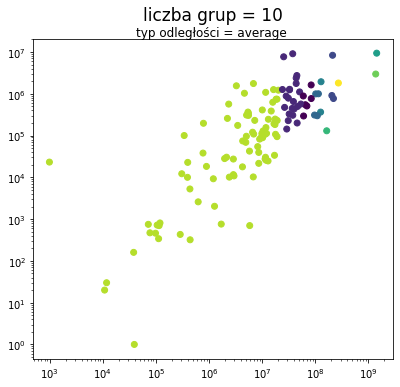

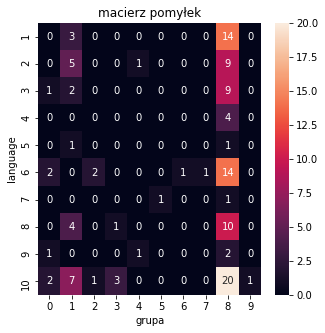

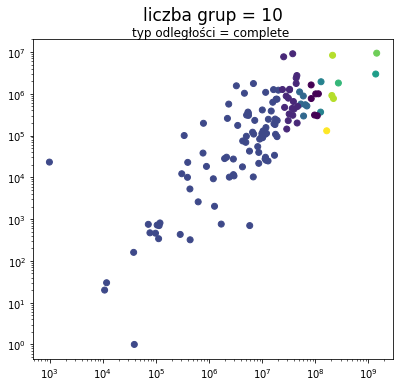

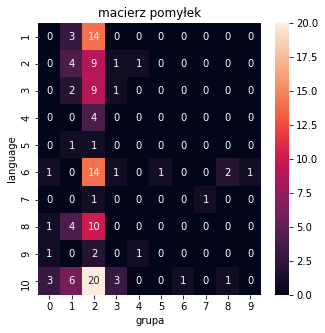

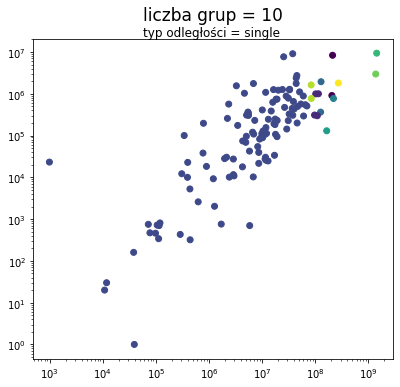

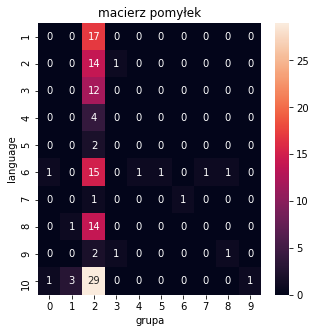

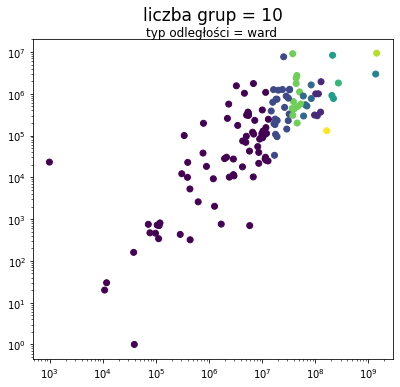

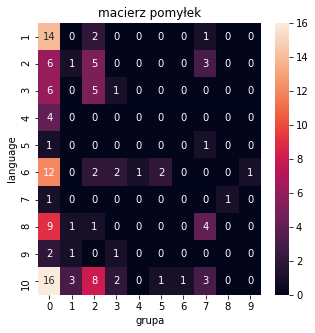

In [ ]:
for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
        plt.figure(figsize=(5, 5))
        ax = plt.gca()
        grupy = linkage(df_noclass, method=typ_odleglosci, metric='euclidean')
        model = AgglomerativeClustering(linkage = typ_odleglosci, n_clusters = 10)
        model.fit(df_noclass)
        df_noclass['grupa'] = model.labels_
        plt.scatter(df_noclass.population, df_noclass.area, c = model.labels_)
        plt.title('typ odległości = %s ' % typ_odleglosci, fontdict=dict(verticalalignment = 'top'))
        plt.subplots_adjust(bottom = 0, top = .89, wspace = 0, left = 0, right = 1)
        plt.suptitle('liczba grup = %i' % 10, size = 17)
        ax.set_xscale('log')
        ax.set_yscale('log')
        plt.figure(figsize=(5, 5))
        pomylki = pd.crosstab(df_class['language'],df_noclass['grupa'])
        sns.heatmap(pomylki,annot = pomylki)
        plt.title('macierz pomyłek')

Patrząc na powyższe wykresy punktowe i macierze pomyłek, można wysnuć fakt, jako iż żaden sposób wyznaczania odległości międzygrupowej nie daje nam zadowalających rezultatów. Większość wartości atrybutów jest przypisywana tylko do jednej klasy.

## **Uczenie nadzorowane**

Do klasyfikacji została użyta biblioteka sklearn do  uczenia maszynowego. Z biblioteki  tej zostały zaimportowane między innymi pakiety służące do podziału zbioru na zbiór uczący i testowy oraz do stworzenia modeli. 

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Następnie za pomocą metody get_dummies() kolumny z atrybutami kategorycznymi zostały rozdzielone na oddzielne kolumny z wartościami 0 lub 1.

In [ ]:
df_clean = pd.get_dummies(df.drop(['country'], axis = 1))
df_clean.columns

Index(['landmass', 'zone', 'language', 'religion', 'bars', 'stripes',
       'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange',
       'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',
       'triangle', 'icon', 'animate', 'text', 'population', 'area', 'density',
       'mainhue_black', 'mainhue_blue', 'mainhue_brown', 'mainhue_gold',
       'mainhue_green', 'mainhue_orange', 'mainhue_red', 'mainhue_white',
       'topleft_black', 'topleft_blue', 'topleft_gold', 'topleft_green',
       'topleft_orange', 'topleft_red', 'topleft_white', 'botright_black',
       'botright_blue', 'botright_brown', 'botright_gold', 'botright_green',
       'botright_orange', 'botright_red', 'botright_white'],
      dtype='object')

Ramka danych została podzielona na ramkę bez kolumny landmass oraz na ramkę składającą się tylko z kolumny landmass.

In [ ]:
X = df_clean.drop('landmass', axis = 1)
y = df_clean['landmass']
print("Wielkości macierzy")
print(X.shape)
print(y.shape)

Wielkości macierzy
(125, 49)
(125,)


Poniżej podzieliliśmy dane na zbiór uczący oraz testowy i dokonaliśmy standaryzacji za pomocą metody StandardScaler() 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Następnie zostało stworzonych kilka modeli m.in. model K-najbliższych sąsiadów oraz drzewo decyzyjne i zostały wyliczone ich wyniki dla zbioru uczącego i testowego.

In [ ]:
lr = LogisticRegression(random_state = 42)

lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv = 5)

lr.fit(X_train_scaled, y_train)

print('Train score:',lr.score(X_train_scaled, y_train))
print('Test score:',lr.score(X_test_scaled, y_test))

Train score: 0.978494623655914
Test score: 0.3125


In [ ]:
knn = KNeighborsClassifier()

knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv = 5)

knn.fit(X_train_scaled, y_train)

print('Train score:',knn.score(X_train_scaled, y_train))
print('Test score:',knn.score(X_test_scaled, y_test))

Train score: 0.6666666666666666
Test score: 0.375


In [ ]:
nb = GaussianNB()

nb_scores = cross_val_score(nb, X_train_scaled, y_train, cv = 5)
nb.fit(X_train_scaled, y_train)

print('Train score:',nb.score(X_train_scaled, y_train))
print('Test score:',nb.score(X_test_scaled, y_test))

Train score: 0.5913978494623656
Test score: 0.34375


In [ ]:
dt = DecisionTreeClassifier(class_weight = 'balanced')

dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv = 5)

dt.fit(X_train_scaled, y_train)

print('Train score:',dt.score(X_train_scaled, y_train))
print('Test score:',dt.score(X_test_scaled, y_test))

Train score: 1.0
Test score: 0.4375


***WNIOSKI***

Analizując wyniki klasyfikacji, można wysnuć fakt, który mówi nam o tym, że nie da się stworzyć modelu, który nam wytypuje na jakim kontynencie leży dany kraj. Mimo to, nalepszym testowanym klasyfikatorem okazał się klasyfikator drzewa decyzyjnego.

Na koniec za pomocą poniższych funkcji pomocniczych został dokonany podział na zbiór uczący i testowy. Zastosowano modele:

*   K-najbliższych sąsiadów (dla 3 i 5 sąsiadów)
*   Naiwnego klasyfikatora Bayesa
*   Najbliższego centroidu.
*   Drzewa decyzyjnego (dla głębokości 3 i 5)

Wszystkie modele zostały wyświetlone na wykresach oraz zweryfkowane za pomocą macierzy pomyłek.

In [ ]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

In [ ]:
def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test)) 

In [ ]:
def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # wyświetla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyświetlany tytuł wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    if (kontur == 1):    
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    ax = plt.gca()
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')
    ax.set_xscale('log')
    ax.set_yscale('log')

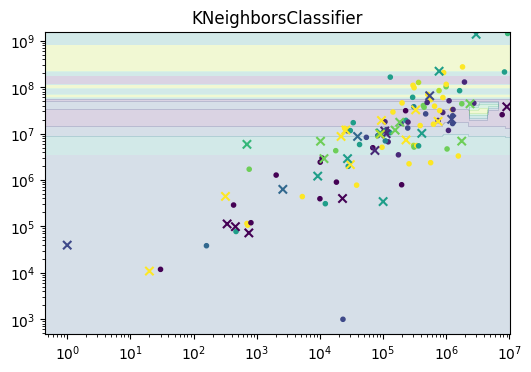

Macierz pomyłek dla zbioru uczącego
col_0  0   1  2  4  5  7   9
row_0                       
0      9   0  1  0  0  0   2
1      1  10  0  0  0  0   1
2      1   1  7  0  0  0   0
3      1   0  1  0  0  0   0
4      0   1  0  1  0  0   0
5      1   3  1  0  6  0   2
6      0   0  0  0  1  0   0
7      3   1  0  2  0  1   1
8      0   1  0  0  2  0   0
9      4   1  2  1  2  0  15
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  3  4  5  9
row_0                     
0      1  0  0  1  1  0  2
1      1  0  2  0  0  0  0
2      1  1  0  0  0  0  1
3      0  0  1  0  0  0  1
5      3  0  2  0  0  1  1
6      0  0  0  0  0  1  0
7      1  4  2  0  0  0  0
8      0  0  1  0  0  0  0
9      3  3  2  0  0  0  1


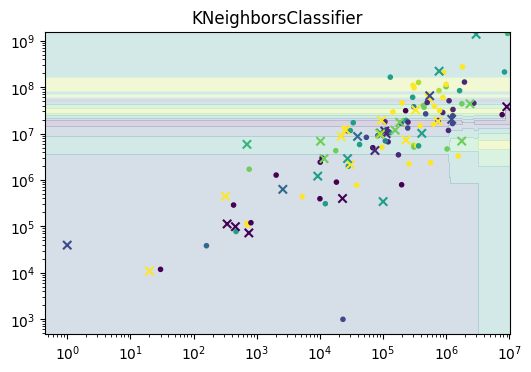

Macierz pomyłek dla zbioru uczącego
col_0  0  1  2  5  7   9
row_0                   
0      8  0  1  0  0   3
1      1  7  1  0  0   3
2      1  1  7  0  0   0
3      1  1  0  0  0   0
4      0  1  0  0  1   0
5      1  2  1  4  0   5
6      0  0  0  1  0   0
7      1  1  0  0  4   2
8      0  0  0  1  0   2
9      3  2  3  4  1  12
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  5  7  9
row_0                  
0      1  0  0  0  1  3
1      0  0  2  0  1  0
2      1  1  0  0  0  1
3      1  1  0  0  0  0
5      3  0  0  4  0  0
6      0  0  0  1  0  0
7      1  4  1  1  0  0
8      0  0  1  0  0  0
9      2  4  1  0  0  2


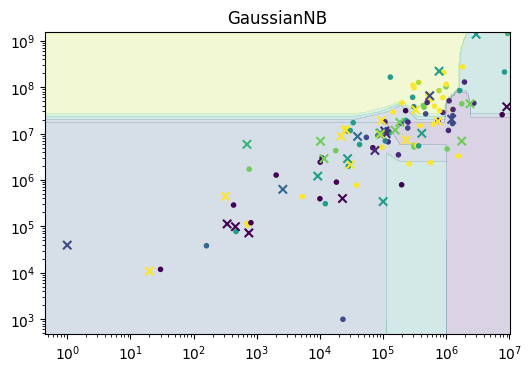

Macierz pomyłek dla zbioru uczącego
col_0  0  1  2  3  4  5  6   9
row_0                         
0      0  0  0  9  2  1  0   0
1      0  2  5  1  0  2  0   2
2      0  1  4  3  0  0  0   1
3      0  0  0  2  0  0  0   0
4      0  0  0  1  0  0  0   1
5      0  1  4  5  0  1  0   2
6      0  0  0  0  0  0  1   0
7      1  1  1  2  0  0  0   3
8      0  0  1  0  0  0  0   2
9      1  1  6  5  1  1  0  10
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  3  5  9
row_0                  
0      0  0  0  4  1  0
1      0  0  2  1  0  0
2      0  0  1  1  0  1
3      0  0  0  2  0  0
5      0  0  1  4  1  1
6      0  0  0  1  0  0
7      1  1  2  3  0  0
8      0  0  0  1  0  0
9      0  0  3  5  0  1


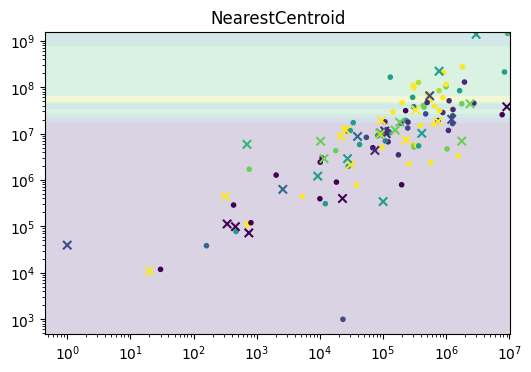

Macierz pomyłek dla zbioru uczącego
col_0  0  1  2   3  4  5  6  7  8  9
row_0                               
0      0  0  0  10  1  0  0  1  0  0
1      1  1  3   1  1  2  0  1  1  1
2      1  0  5   1  1  0  0  1  0  0
3      1  0  0   1  0  0  0  0  0  0
4      1  1  0   0  0  0  0  0  0  0
5      2  0  3   3  1  0  0  0  3  1
6      0  0  0   0  0  0  1  0  0  0
7      0  1  0   4  0  2  0  0  1  0
8      1  0  0   0  0  0  0  0  2  0
9      1  2  3   8  0  1  0  2  6  2
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  3  4  5  6  8
row_0                        
0      0  1  0  4  0  0  0  0
1      1  0  1  1  0  0  0  0
2      0  0  0  1  1  0  0  1
3      1  0  0  1  0  0  0  0
5      0  0  2  3  0  0  1  1
6      1  0  0  0  0  0  0  0
7      2  0  3  1  0  1  0  0
8      1  0  0  0  0  0  0  0
9      2  1  1  3  2  0  0  0


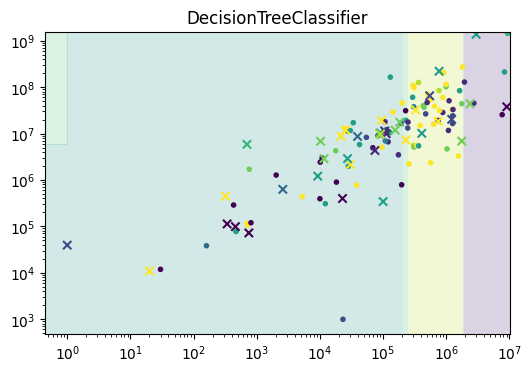

Macierz pomyłek dla zbioru uczącego
col_0  0  1  2  5  7   9
row_0                   
0      8  1  0  3  0   0
1      0  2  0  3  0   7
2      0  0  2  4  0   3
3      1  0  0  1  0   0
4      0  0  0  1  0   1
5      2  1  0  7  0   3
6      0  1  0  0  0   0
7      1  0  0  0  1   6
8      0  0  0  0  0   3
9      1  0  1  4  0  19
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  5  7  9
row_0                  
0      2  1  1  0  0  1
1      0  0  0  3  0  0
2      1  0  0  0  0  2
3      1  0  0  1  0  0
5      1  1  1  2  0  2
6      0  0  0  0  1  0
7      1  1  0  3  1  1
8      0  0  0  1  0  0
9      2  0  2  3  0  2


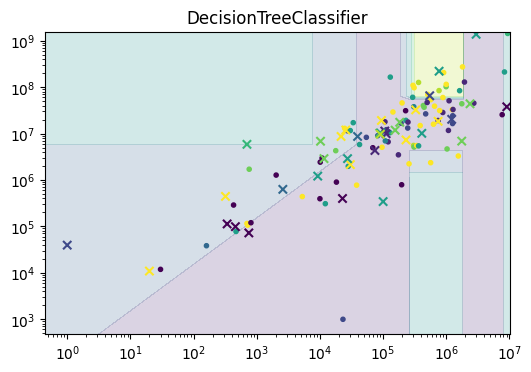

Macierz pomyłek dla zbioru uczącego
col_0   0  1  2  3  5  7   9
row_0                       
0      11  0  1  0  0  0   0
1       1  9  2  0  0  0   0
2       0  3  6  0  0  0   0
3       0  0  1  1  0  0   0
4       0  1  1  0  0  0   0
5       1  1  4  0  6  0   1
6       0  0  0  0  1  0   0
7       0  5  0  0  0  2   1
8       0  1  0  0  0  0   2
9       3  6  2  0  0  0  14
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  5  7  9
row_0                  
0      1  0  1  1  0  2
1      1  0  2  0  0  0
2      1  1  0  0  0  1
3      1  0  1  0  0  0
5      2  2  2  0  0  1
6      0  0  0  0  1  0
7      1  2  3  0  1  0
8      0  0  1  0  0  0
9      2  2  4  1  0  0


In [ ]:
# podział zbioru danych
d = podziel(df_class, .3)
# zdefiniowanie modelów klasyfikatora
models = [KNeighborsClassifier(n_neighbors=i) for i in [3,5]] + [GaussianNB(), NearestCentroid()] + [tree.DecisionTreeClassifier(max_depth=i) for i in [3,5]]
models_name = [str(model)[0:(str(model).rfind('('))] for model in models]

# wybór atrybutów wpływających na klasę obieku
ax, ay = -1,-2
for i,model in enumerate(models):
    # granice dycyzyjne
    granice(model,d,ax,ay, models_name[i])
    plt.show()
    # weryfikacja
    weryfikuj(model,d,[ax,ay])

***WNIOSKI***

Żaden model nie sklasyfikował atrybutów area i population na tyle, aby ocenić jakim językim posługuje się kraj z danymi dwoma atrybutami. Z tego faktu wynika wniosek, jako iż język nie jest zależny ani od populacji ani od powierzchni. Mimo wszystko, spośród sześciu testowanych modeli najlepsze grupowanie zostało przeprowadzone przez model KNearestNeighbors dla k = 5.